<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color="blue">**Machine Learning**

In [ ]:
!pip install livelossplot --quiet
from livelossplot import PlotLossesKerasTF
import tensorflow as tf

#### **Regularization**

###### Overfitting & (Weight) Regularization Techniques

https://www.machinecurve.com/index.php/2020/01/23/how-to-use-l1-l2-and-elastic-net-regularization-with-keras/#elastic-net-kernel-bias-regularization

https://towardsdatascience.com/understanding-the-scaling-of-l²-regularization-in-the-context-of-neural-networks-e3d25f8b50db

https://medium.com/@savannahar68/getting-started-with-regression-a39aca03b75f

**Problem Statement**

* A fundamental problem in machine learning is the possibility of overfitting training data and carrying the noise of that data through to the test set, thereby providing inaccurate generalizations. Overfitting is when you have a complicated model that gives worse predictions than a simpler model.
* A network with large network weights can be a sign of an unstable network where small changes in the input can lead to large changes in the output. This can be a sign that the network has overfit the training dataset and will likely perform poorly when making predictions on new data. A solution to this problem is to update the learning algorithm to encourage the network to keep the weights small. This is called [weight regularization](https://machinelearningmastery.com/weight-regularization-to-reduce-overfitting-of-deep-learning-models/).
* Regularization is a technique for preventing a model from overfitting (e.g. preventing over-fitting by penalizing a model for having large weights).

**Trivial Regularization Approaches**

* Add more data
* Simpler model (reduce variance by taking into account fewer variables and parameters, thereby removing some of the noise in the training data)
* Use ensemble models

**Particular Regularization Techniques**
* Vectornorm (L1, L2, or Elastic Net)
* Dropout
* Jitter (add noise)
* Batch size
* Early stopping (this is not a formal regularization method, but can effectively limit overfitting). 

**Overfitting: Variance-Bias-Tradeoff**: [Regularization and Geometry](https://towardsdatascience.com/regularization-and-geometry-c69a2365de19) & [The Bias-Variance Tradeoff
](https://towardsdatascience.com/the-bias-variance-tradeoff-8818f41e39e9)

**Benefits of regularization from a mathematical optimization point of view**

* Machine learning is an optimization problem, where we try to minimize a cost function to find optimal values for our model's parameter. Some machine learning models, like neural networks, have non-convex cost functions. Stationary points in these cost functions are problematic because numerical optimization schemes (like gradient descent) can easily get stuck, leading to poor results.
* Regularization can be used as a way of ‚convexifying‘ a non-convex cost function. The L2 regularizer, being an upward-facing convex function, can unflatten flat regions and curve up some stationary points without severely changing the minimum locations (e.g L2 regularized cost no longer has an issue with saddle points, as the region surrounding it has been curved upwards).
* Regularization can also help with the optimization of convex machine learning problems, when is not invertible. For example the solution to the L2 regularized version of linear regression is given by is the regularization parameter, which can be set large enough so that becomes invertible.

**Theoretical Foundation** 

Modify cost function J by adding 'preference' to certain parameter values:

$J(\underline{\theta})=\frac{1}{2}\left(\underline{y}-\underline{\theta} \underline{X}^{T}\right) \cdot\left(\underline{y}-\underline{\theta} \underline{X}^{T}\right)^{T}+\alpha \theta \theta^{T}$

New solution (derive the same way) - problem is now well-posed for any degree:

$\underline{\theta}=\underline{y} \underline{X}\left(\underline{X}^{T} \underline{X}+\alpha I\right)^{-1}$

* Shrinks parameters towards zero
* Alpha large: we prefer small theta to small MSE
* Regularization term is independent of the data: paying more attention reduces variance.

###### L1 (Vectornorm)

In [ ]:
lasso = tf.keras.regularizers.l1(l=0.0005)

Traditional methods like cross-validation, stepwise regression to handle overfitting and perform feature selection work well with a small set of features but vectornorm regularization is a great alternative when dealing with a large set of features.

<p>
$\sum_{i=1}^{n}\left|u_{i}\right|=\sum_{i=1}^{n}\left|y_{i}-b_{0}-b_{1} x_{i}\right|$
</p><br>


$d_{1} \equiv d_{\mathrm{SAD}}:(x, y) \mapsto\|x-y\|_{1}=\sum_{i=1}^{n}\left|x_{i}-y_{i}\right|$

* **Synonyms**: Lasso, Manhatten distance, least absolute deviations (LAD method), least absolute errors (LAE)
* **Fun Fact**: L1 Regularization is analytical equivalent to Laplacean prior
* **Summary**: Sum of the absolute weights. Gives sparse solutions, since it does not take all features. Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.
* **Advantages**: less influenced by outliers (robust). Can shrink some coefficients to zero while lambda increases, performing variable selection. generates sparse feature vectors (Sparse: only very few entries in a matrix or vector is non-zero. L1-norm has property of producing many coefficients with zero values or very small values with few large coefficients). Sparse is sometimes good eg. in high dimensional classification problems. sparsity properties: calculation more computationally efficient.
* **Disadvantages**: L1 regularization doesn’t easily work with all forms of training. gives a solution with more large residuals, and a lot of zeros in the solution.
* **Use Cases**: 
  * if only a subset of features are correlated with the label, as in lasso model some coefficient can be shrunken to zero. 
  * very useful when you want to understand exactly which features are contributing to a decision. 
  * if you can ignore the ouliers in your dataset or you need them to be there. 
  * use L1 when constraints on feature extraction: easily avoid computing a lot of computationally expensive features  at the cost of some of the accuracy, since the L1-norm will give us a solution which has the weights for a large set of features set to zero (real-time detection or tracking of an object/face/material using a set of diverse handcrafted features with a large margin classifier like an SVM in a sliding window fashion - you'd probably want feature computation to be as fast as possible in this case).
* **Bayesian**: L1 usually corresponds to setting a Laplacean prior: Some of the coefficients will shrink to zero: similar effect would be achieved in Bayesian linear regression using a Laplacian prior (strongly peaked at zero) on each of the beta coefficients.



**Add L1 (Lasso) Penalty Term to Cost Function**

$\sum_{i=1}^{n}\left(Y_{i}-\sum_{j=1}^{p} X_{i j} \beta_{j}\right)^{2}+\lambda \sum_{j=1}^{p}\left|\beta_{j}\right|$

* Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.
* If lambda is zero then we will get back OLS whereas very large value will make coefficients zero hence it will under-fit. 
* Learn more on [Google Course](https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/lambda): Regularization for Simplicity: Lambda

###### L2 (Vectornorm)

In [ ]:
ridge = tf.keras.regularizers.l2(l=0.0005)

<p>
$\sum_{i=1}^{n} u_{i}^{2}=\sum_{i=1}^{n}\left(y_{i}-b_{0}-b_{1} x_{i}\right)^{2}$
</p><br>

* **Synonyms**: Weight Decay, Ridge Regression, KQ-Methode, kleinste Quadrate, [Tikhonov regularization](https://en.m.wikipedia.org/wiki/Tikhonov_regularization), Euclidean distance, least squares error (LSE)
* **Fun Fact**: L2 Regularization is analytically equivalent to Gaussian prior
* **Summary**: Sum of the squared weights. Is the most common type of regularization, also called simply “weight decay,” with values often on a logarithmic scale between 0 and 0.1, such as 0.1, 0.001, 0.0001, etc.
* **Advantages**: Shrinks all the coefficient by the same proportions, but eliminates none. Leads to small distributed weights in neural networks. The L2 regularization heavily penalizes "peaky" weight vectors and prefers diffuse weight vectors. Empirically performs better than L1. The fit for L2 will be more precise than L1. Works with all forms of training. Smoother: fewer large residual values along with fewer very small residuals as well. L2-norm has analytical solution - allows the L2-norm solutions to be calculated computationally efficiently.
* **Disadvantages**: Sensitive to outliers, since L2 wants all errors to be tiny and heavily penalizes anyone who doesn't obey. Computation heavy compared to the L1 norm. Doesn’t give you implicit feature selection.
* **Use Cases**: Use ridge if all the features are correlated with the label, as the coefficients are never zero in ridge. 
* **Bayesian**: L2 similarly corresponds to Gaussian prior. As one moves away from zero, the probability for such a coefficient grows progressively smaller. The square loss penalty can be seen as putting a Gaussian prior on your weights.


**Add L2 (Ridge) Penalty Term to Cost Function**

$\sum_{i=1}^{n}\left(y_{i}-\sum_{j=1}^{p} x_{i j} \beta_{j}\right)^{2}+\lambda \sum_{j=1}^{p} \beta_{j}^{2}$

* Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function.
* If lambda is zero then you can imagine we get back OLS. However, if lambda is very large then it will add too much weight and it will lead to under-fitting. Having said that it’s important how lambda is chosen.

##### **Elastic Net (Vectornorm)**

In [ ]:
elasticnet = tf.keras.regularizers.L1L2(l1=0.0, l2=0.0)

* Method that linearly combines the L1 and L2 penalties of the lasso and ridge methods, at the "only" cost of introducing another hyperparameter to tune (see Hastie's paper on stanford.edu).
* Overcome limitations of L1: in the "large p, small n" case (high-dimensional data with few examples), the LASSO selects at most n variables before it saturates. Also if there is a group of highly correlated variables, then the LASSO tends to select one variable from a group and ignore the others.
* Solution in elastic net: add quadratic part to penalty (L2). quadratic penalty term makes the loss function strictly convex, and it therefore has a unique minimum.
* Naive version of elastic net method finds an estimator in a two-stage procedure : first for each fixed λ2 it finds the ridge regression coefficients, and then does a LASSO type shrinkage. This kind of estimation incurs a double amount of shrinkage, which leads to increased bias and poor predictions. To improve the prediction performance, the authors rescale the coefficients of the naive version of elastic net by multiplying the estimated coefficients by (1+λ2).

**Special: Analytical Equivalence**

Why is L2 Regularization is analytically equivalent to Gaussian prior?


https://stats.stackexchange.com/questions/163388/why-is-the-l2-regularization-equivalent-to-gaussian-prior/163450#163450


##### **Dropout**

In [ ]:
dropout = 0.3

**What is it and how it works?**

* Ziel: Overfitting vermeiden
* Dropout forces a neural network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.
* Dropout roughly doubles the number of iterations required to converge. However, training time for each epoch is less. With H hidden units, each of which can be dropped, we have 2^H possible models. In testing phase, the entire network is considered and each activation is reduced by a factor p.
At test time the whole network is used (all units) but with scaled down weights. Mathematically this approximates ensemble averaging (using the geometric mean as average). Two papers that explain this much better are:
* Hinton et al, [1207.0580] Improving neural networks by preventing co-adaptation of feature detectors, 2012 (probably the original paper on dropout)
* Warde-Farley et al, [1312.6197] An empirical analysis of dropout in piecewise linear networks, 2014 (analyzes dropout specially for the case of using ReLU as activation function -arguably the most popular- , and checks the behavior of the geometric mean for ensemble averaging).
* Andrew Ng: dropout is nothing more than an adaptive form of L2 regularization and that both methods have similar effects
* The dropout will randomly mute some neurons in the neural network and we therefore have a sparse network which hugely decreases the possibility of overfitting. More importantly, the dropout will make the weights spread over the input features instead of focusing on some features. https://hackernoon.com/is-the-braess-paradox-related-to-dropout-in-neural-nets-270ecb97cdeb https://de.m.wikipedia.org/wiki/Dropout_(künstliches_neuronales_Netz)

**Is dropout outdated?**

Neural Network:  Dropout

https://medium.com/@bingobee01/a-review-of-dropout-as-applied-to-rnns-72e79ecd5b7b

Don’t Use Dropout in Convolutional Networks
https://towardsdatascience.com/dont-use-dropout-in-convolutional-networks-81486c823c16

Instead you should insert batch normalization between your convolutions. This will regularize your model, as well as make your model more stable during training.

First, dropout is generally less effective at regularizing convolutional layers: The reason? Since convolutional layers have few parameters, they need less regularization to begin with. Furthermore, because of the spatial relationships encoded in feature maps, activations can become highly correlated. This renders dropout ineffective. ([Source](https://www.reddit.com/r/MachineLearning/comments/5l3f1c/d_what_happened_to_dropout/))

Second, what dropout is good at regularizing is becoming outdated: Large models like VGG16 included fully connected layers at the end of the network. For models like this, overfitting was combatted by including dropout between fully connected layers. Unfortunately, [recent architectures](https://arxiv.org/pdf/1512.03385.pdf) move away from this fully-connected block. By replacing dense layers with global average pooling, modern convnets have reduced model size while improving performance.

**Use Dropout along with L1/L2 Regularization?**

* You can, but it is still not clear whether using both at the same time acts synergistically or rather makes things more complicated for no net gain.
* While ℓ 2 regularization is implemented with a clearly-defined penalty term, dropout requires a random process of “switching off” some units, which cannot be coherently expressed as a penalty term and therefore cannot be analyzed other than experimentally.
* they both try to avoid the network’s over-reliance on spurious correlations, which are one of the consequences of overtraining that wreaks havoc with generalization. But more detailed research is necessary to determine whether and when they can “work together” or rather end up “fighting each other”. So far, it seems the results tend to vary in a case-by-case fashion. Using both can increase accuracy: https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf (Hinton paper 2014) 

##### **Batch Normalization & Size**

https://towardsdatascience.com/understanding-batch-normalization-for-neural-networks-1cd269786fa6

Small batches can oﬀer a regularizing eﬀect (Wilson and Martinez, 2003), perhaps due to the noise they add to the learning process.

Using a smaller batch size is like using some regularization to avoid converging to sharp minimizers. The gradients calculated with a small batch size are much more noisy than gradients calculated with large batch size, so it's easier for the model to escape from sharp minimizers, and thus leads to a better generalization. Generalization error is often best for a batch size of 1. Training with such a small batch size might require a small learning rate to maintain stability because of the high variance in the estimate of the gradient. The total runtime can be very high as a result of the need to make more steps, both because of the reduced learning rate and because it takes more steps to observe the entire training set.)

**Batch Normalization**

* Batch normalization is another method to regularize a (convolutional) network.
* On top of a regularizing effect, batch normalization also gives your convolutional network a resistance to vanishing gradient during training. This can decrease training time and result in better performance.
* Batch Normalization Combats Vanishing Gradient
* Batch normalization replaces dropout.
* Even if you don’t need to worry about overfitting there are many benefits to implementing batch normalization. Because of this, and its regularizing effect, batch normalization has largely replaced dropout in modern convolutional architectures.
* “We presented an algorithm for constructing, training, and performing inference with batch-normalized networks. The resulting networks can be trained with saturating nonlinearities, are more tolerant to increased training rates, and often do not require Dropout for regularization.” -[Ioffe and Svegedy 2015](https://arxiv.org/pdf/1502.03167.pdf)



**Batch Size**

Why use batches?
To avoid that small datasets increase overfitting to this datasets and worsen overall accuracy. But batch size shouldnt be too big either (computation time, speed of convergence of an algorithm)

* Research 1: a low batch size means a very noisy gradient (because computed on a very small subset of the dataset), and a high learning rate means noisy steps.
https://towardsdatascience.com/recent-advances-for-a-better-understanding-of-deep-learning-part-i-5ce34d1cc914

* Research 2: How do you choose your batch size in deep learning/SGD? - An interesting concept so-called "generalization gap": Train longer, generalize better: closing the generalization gap in large batch training of neural networks:
https://arxiv.org/abs/1705.08741



**Covariate Shift**

pending...

##### **Jitter (Noise)**

* adding annealed Gaussian noise by decaying the variance works better than using fixed Gaussian noise

##### **Define Model & Run**

In [ ]:
# Kernel Regularizer - Regularizer function applied to the kernel weights matrix.
kernel_regularizer = lasso

In [ ]:
# Bias Regularizer - Regularizer function applied to the bias vector
bias_regularizer = ridge

In [ ]:
# Activity Regularizer - Regularizer function applied to the output of the layer (its "activation")
activity_regularizer = None

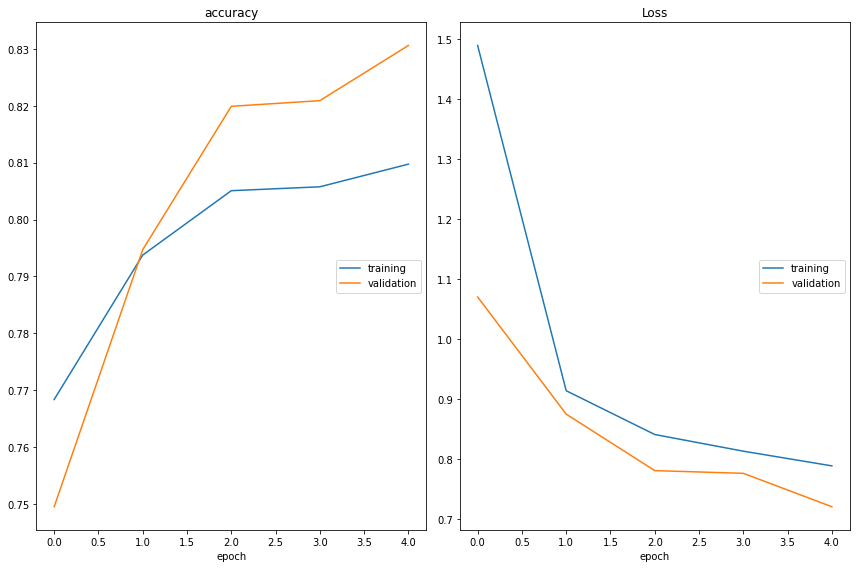

accuracy
	training         	 (min:    0.768, max:    0.810, cur:    0.810)
	validation       	 (min:    0.749, max:    0.831, cur:    0.831)
Loss
	training         	 (min:    0.789, max:    1.490, cur:    0.789)
	validation       	 (min:    0.721, max:    1.070, cur:    0.721)
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7889 - accuracy: 0.8097 - val_loss: 0.7208 - val_accuracy: 0.8306


In [ ]:
# Load & Prepare Model
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation='relu', 
                                kernel_regularizer=kernel_regularizer, 
                                bias_regularizer=bias_regularizer, 
                                activity_regularizer=activity_regularizer))
model.add(tf.keras.layers.Dropout(dropout))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile Model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train Model
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKerasTF()],
          verbose=1)

#### **Optimizer**

https://algorithmia.com/blog/introduction-to-optimizers

https://juntang-zhuang.github.io/adabelief/

##### **Intro**

* why optimizer
* what is it doing

https://medium.com/explorations-in-language-and-learning/a-short-note-on-gradient-descent-optimization-algorithms-335546c5a896


An overview of gradient descent optimization algorithms

https://arxiv.org/pdf/1609.04747.pdf

**Which Optimizer to use?**

* Wich optimizer should you now use? If your input data is sparse, then you likely achieve the best results using one of the adaptive learning-rate methods. An additional benefit is that you won't need to tune the learning rate but likely achieve the best results with the default value.
* In summary, RMSprop is an extension of Adagrad that deals with its radically diminishing learning rates. It is identical to Adadelta, except that Adadelta uses the RMS of parameter updates in the numinator update rule. Adam, finally, adds bias-correction and momentum to RMSprop. Insofar, RMSprop, Adadelta, and Adam are very similar algorithms that do well in similar circumstances. Kingma et al. [15] show that its bias-correction helps Adam slightly outperform RMSprop towards the end of optimization as gradients become sparser. Insofar, Adam might be the best overall choice.
* Interestingly, many recent papers use vanilla SGD without momentum and a simple learning rate annealing schedule. As has been shown, SGD usually achieves to find a minimum, but it might take significantly longer than with some of the optimizers, is much more reliant on a robust initialization and annealing schedule, and may get stuck in saddle points rather than local minima. Consequently, if you care about fast convergence and train a deep or complex neural network, you should choose one of the adaptive learning rate methods.

**Comparison**

* Few days ago, an interesting paper titled The Marginal Value of Adaptive Gradient Methods in Machine Learning (https://arxiv.org/abs/1705.08292) from UC Berkeley came out. In this paper, the authors compare adaptive optimizer (Adam, RMSprop and AdaGrad) with SGD, observing that SGD has better generalization than adaptive optimizers.
* “We observe that the solutions found by adaptive methods generalize worse (often significantly worse) than SGD, even when these solutions have better training performance. These results suggest that practitioners should reconsider the use of adaptive methods to train neural networks.”
* I was astounded by their finding since I never used SGD before and consider it as an outdated optimizer with slower convergence than Adam or RMSprop. Am I totally wrong from the very beginning?

https://medium.com/vitalify-asia/whats-up-with-deep-learning-optimizers-since-adam-5c1d862b9db0


##### **Learning Rate**

In [ ]:
learning_rate = 0.001

https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

* being used in optimizers / cost function
* Learning rate is an important component of backpropagation in a neural network:
* New Value of weight a = Old value a - (learning rate * gradient ∂SSE/∂a) θ=θ−η⋅∇θJ(θ)

**Ian Goodfellow answering to "Why do not use the whole training set to compute the gradient?" on Quora**

* The size of the learning rate is limited mostly by factors like how curved the cost function is. You can think of gradient descent as making a linear approximation to the cost function, then moving downhill along that approximate cost. 
* If the cost function is highly non-linear (highly curved) then the approximation will not be very good for very far, so only small step sizes are safe. You can read more about this in Chapter 4 of the deep learning textbook, on numerical computation: http://www.deeplearningbook.org/contents/numerical.html
* When you put m examples in a minibatch, you need to do O(m) computation and use O(m) memory, but you reduce the amount of uncertainty in the gradient by a factor of only O(sqrt(m)). In other words, there are diminishing marginal returns to putting more examples in the minibatch. You can read more about this in Chapter 8 of the deep learning textbook, on optimization algorithms for deep learning: http://www.deeplearningbook.org/contents/optimization.html
* Also, if you think about it, even using the entire training set doesn’t really give you the true gradient. The true gradient would be the expected gradient with the expectation taken over all possible examples, weighted by the data generating distribution. Using the entire training set is just using a very large minibatch size, where the size of your minibatch is limited by the amount you spend on data collection, rather than the amount you spend on computation.


**Reasons for using a Learning Rate**

* Prevent overreaction which can cause loss increase
* Neural networks are often trained by gradient descent on the weights. This means at each iteration we use backpropagation to calculate the derivative of the loss function with respect to each weight and subtract it from that weight. 
* However, if you actually try that, the weights will change far too much each iteration, which will make them “overcorrect” and the loss will actually increase/diverge. So in practice, people usually multiply each derivative by a small value called the “learning rate” before they subtract it from its corresponding weight.
* You can also think of a neural networks loss function as a surface, where each direction you can move in, represents the value of a weight. Gradient descent is like taking leaps in the current direction of the slope, and the learning rate is like the length of the leap you take.
* Learning rate decay os alternative to momentum: when replacing gradient descent with SDG, we take smaller, noisier steps towards objective (minimum).
* How small should steps be? Much research! Always: beneficial to make steps smaller and smaller; i.e. apply exponential decay to learning rate, others make smaller every time loss reaches a plateau

**Challenges**

* Which learning rate: If low, training is more reliable, but optimization will take a lot of time because steps towards the minimum of the loss function are tiny. If learning rate is high, then training may not converge or even diverge. Weight changes can be so big that the optimizer overshoots the minimum and makes the loss worse.
* A learning rate that is too small leads to painfully slow convergence, while a learning rate that is too large can hinder convergence and cause the loss function to fluctuate around the minimum or even to diverge.
* Which Cost function: with SSE cost function the value of θF(Wj)/θWj gets larger and larger as we increase the size of the training dataset
* Change learning rate during process? Upwards or downwards?
* Learning rate schedules [11] try to adjust the learning rate during training by e.g. annealing, i.e. reducing the learning rate according to a pre-defined schedule or when the change in objective between epochs falls below a threshold. These schedules and thresholds, however, have to be defined in advance and are thus unable to adapt to a dataset's characteristics [10].
* Additionally, the same learning rate applies to all parameter updates. If our data is sparse and our features have very different frequencies, we might not want to update all of them to the same extent, but perform a larger update for rarely occurring features.
* As full-scale hyperparameter optimization: Selecting a learning rate is a "meta-problem" (hyperparameter optimization). The best learning rate depends on the problem at hand, as well as on the architecture of the model being optimized, and even on the state of the model in the current optimization process! There are even software packages devoted to hyperparameter optimization such as spearmint and hyperopt (just a couple of examples, there are many others!)

**Cosine Annealing**

**Adapting learning rate in each iteration downwards (Annealing)**

Optimize is the learning rate during training. conventional: decrease over time. There are Multiple ways: step-wise learning rate annealing when the loss stops improving, exponential learning rate decay, cosine annealing, etc. [Source](
https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/)

**Notes on adaptive**
* Adapt the value of λ in each iteration. The farther you are from optimal values the faster you should move towards the solution and value of λ should be larger. (The training should start from a relatively large learning rate because, in the beginning, random weights are far from optimal. Then decrease learning rate to allow more fine-grained weight updates.
* Check value of error function at the end of each iteration. If error rate reduced since last iteration, increase learning rate by 5%. If error rate increased (=skipped optimal point) reset values of Wj to values of previous iteration and decrease learning rate by 50%. This is called [Bold Driver](http://www.willamette.edu/~gorr/classes/cs449/momrate.html).
* One technique that's quite common for selecting learning rates: [Simulated annealing](https://en.wikipedia.org/wiki/Simulated_annealing): start with a large learning rate (0.1 or so) and gradually reduce learning rate as optimization progresses, often by an order of magnitude (0.01, then 0.001, 0.0001, etc.).
* Combine with [early stopping](https://en.wikipedia.org/wiki/Early_stopping) to optimize the model with one learning rate as long as progress is being made, then switch to a smaller learning rate once progress appears to slow. The larger learning rates appear to help the model locate regions of general, large-scale optima, while smaller rates help the model focus on one particular local optimum. If the loss does not decrease for several epochs, the learning rate might be too low. The optimization process might also be stuck in a local minimum.
* Weight update tracking: Andrej Karpathy proposed to track weight updates to check if the learning rate is well-chosen. If weight update is too high, then learning rate has to be decreased. If weight update is too low, then learning rate has to be increased.

**Approach 1: Drop-based learning rate schedule**
* Often this method is implemented by dropping the learning rate by half every fixed number of epochs.
* For example, we may have an initial learning rate of 0.1 and drop it by 0.5 every 10 epochs. The first 10 epochs of training would use a value of 0.1, in the next 10 epochs a learning rate of 0.05 would be used, and so on

**Approach 2: Time-based learning rate schedule**
* The learning rate for stochastic gradient descent has been set to a higher value of 0.1. 
* The model is trained for 50 epochs and the decay argument has been set to 0.002, calculated as 0.1/50. 
* Additionally, it can be a good idea to use momentum when using an adaptive learning rate. In this case we use a momentum value of 0.8.
* Increase the initial learning rate. Because the learning rate will very likely decrease, start with a larger value to decrease from. A larger learning rate will result in a lot larger changes to the weights, at least in the beginning, allowing you to benefit from the fine tuning later.
* Use a large momentum. Using a larger momentum value will help the optimization algorithm to continue to make updates in the right direction when your learning rate shrinks to small values.
* Experiment with different schedules. It will not be clear which learning rate schedule to use so try a few with different configuration options and see what works best on your problem. Also try schedules that change exponentially and even schedules that respond to the accuracy of your model on the training or test datasets

**Approach 3: Adapting learning rate in each iteration upwards**
* Leslie N. Smith describes a powerful technique to select a range of learning rates for a neural network in section 3.3 of the 2015 paper ["Cyclical Learning Rates for Training Neural Networks"](https://arxiv.org/abs/1506.01186) . 
* The trick is to train a network starting from a low learning rate and increase the learning rate exponentially for every batch

**Batch Size Incrase vs Learning Rate Decay**

*Don't Decay the Learning Rate, Increase the Batch Size*

* Paper: https://arxiv.org/abs/1711.00489
* It is common practice to decay the learning rate. Here we show one can usually obtain the same learning curve on both training and test sets by instead increasing the batch size during training. This procedure is successful for stochastic gradient descent (SGD), SGD with momentum, Nesterov momentum, and Adam. 
* It reaches equivalent test accuracies after the same number of training epochs, but with fewer parameter updates, leading to greater parallelism and shorter training times. We can further reduce the number of parameter updates by increasing the learning rate ϵ and scaling the batch size B∝ϵ. 
* Finally, one can increase the momentum coefficient m and scale B∝1/(1−m), although this tends to slightly reduce the test accuracy. Crucially, our techniques allow us to repurpose existing training schedules for large batch training with no hyper-parameter tuning. We train ResNet-50 on ImageNet to 76.1% validation accuracy in under 30 minutes.

##### **Momentum**

In [ ]:
momentum = 0.9 # for RMSProp 0.0 / for SGD 0.9


* [Why Momentum Really Works](https://distill.pub/2017/momentum/)

##### **Stochastic Gradient Descent**

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, 
                                    momentum=momentum, 
                                    nesterov=False)

* [tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) documentation & Nesterov algorithm based on [this paper](http://jmlr.org/proceedings/papers/v28/sutskever13.pdf)
* SGD is a stochastic approximation of the gradient descent optimization and iterative method for minimizing an objective function that is written as a sum of differentiable functions. All other optimizers are called „adaptive“, because they have momentum.
* A compromise between computing the true gradient and the gradient at a single example is to compute the gradient against more than one training example (called a "mini-batch") at each step. This can perform significantly better than "true" stochastic gradient descent described, because the code can make use of vectorization libraries rather than computing each step separately. It may also result in smoother convergence, as the gradient computed at each step uses more training examples.
* The convergence of stochastic gradient descent has been analyzed using the theories of convex minimization and of stochastic approximation. Briefly, when the learning rates decrease with an appropriate rate, and subject to relatively mild assumptions, stochastic gradient descent converges almost surely to a global minimum when the objective function is convex or pseudoconvex, and otherwise converges almost surely to a local minimum.[3][4] This is in fact a consequence of the Robbins-Siegmund theorem.
* SGD suffers from 2 problems: (i) being hesitant at steep slopes, and (ii) having same learning rate for all parameters.
* $\theta=\theta-\eta \cdot \nabla_{\theta} J\left(\theta ; x^{(i)} ; y^{(i)}\right)$
* Stochastic gradient descent (SGD) in contrast performs a parameter update for each training example $x^{(i)}$ and label $y^{(i)}$
* Batch gradient descent performs redundant computations for large datasets, as it recomputes gradients for similar examples before each parameter update. SGD does away with this redundancy by performing one update at a time. It is therefore usually much faster and can also be used to learn online. 
* SGD performs frequent updates with a high variance that cause the objective function to fluctuate heavily.

**SGD with Momentum**
* The update vector consists of another term which has the previous update vector (weighted by γ). This helps it to move faster downhill — like a ball.
* The momentum term γ is usually set to 0.9 or a similar value.
* $\begin{aligned}
v_{t} &=\gamma v_{t-1}+\eta \nabla_{\theta} J(\theta) \\
\theta &=\theta-v_{t}
\end{aligned}$
Source: [An overview of gradient descent optimization
algorithms](https://arxiv.org/pdf/1609.04747.pdf)

**SGD with NAG (Nesterov Accelerated Gradient)**
* In Momentum optimizer, the ball may go past the minima due to too much momentum, so we want to have a look-ahead term. 
* In NAG, we take gradient of future position instead of current position.
* $\begin{aligned}
v_{t} &=\gamma v_{t-1}+\eta \nabla_{\theta} J\left(\theta-\gamma v_{t-1}\right) \\
\theta &=\theta-v_{t}
\end{aligned}$

##### **Adam Optimizer**

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-07, 
                                     amsgrad=False)

* "Adaptive Moment Estimation"
* Algorithm based on [this paper](https://arxiv.org/abs/1412.6980) & [tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) documentation
* The theory is that Adam already handles learning rate optimization ([Check paper](http://arxiv.org/pdf/1412.6980v8.pdf)) : "We propose Adam, a method for efficient stochastic optimization that only requires first-order gradients with little memory requirement. The method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients; the name Adam is derived from adaptive moment estimation."
* Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. The method is computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters.
* Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum. It uses the squared gradients to scale the learning rate like RMSprop and it takes advantage of momentum by using moving average of the gradient instead of gradient itself like SGD with momentum.

* $\theta_{t+1}=\theta_{t}-\frac{\eta}{\sqrt{\hat{v}_{t}+\epsilon}} \hat{m}_{t}$

* Adam combines RMSProp with Momentum. So, in addition to using the decaying average of past squared gradients for parameter-specific learning rate, it uses a decaying average of past gradients in place of the current gradient (similar to Momentum).
* The ^ terms are actually bias-corrected averages to ensure that the values are not biased towards 0.

##### **Nadam Optimizer**

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate, 
                                      beta_1=0.9, 
                                      beta_2=0.999, 
                                      epsilon=1e-07)

* "Nesterov Adaptive Moment Estimation"
* Algorithm based on [this paper](http://cs229.stanford.edu/proj2015/054_report.pdf) & [tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Nadam) documentation
* Nadam is Adam with Nesterov momentum

##### **RMSprop Optimizer**

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, 
                                        rho=0.9, 
                                        momentum=momentum, 
                                        epsilon=1e-07, 
                                        centered=False)

* [tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop) documentation
* RMSprop is an unpublished optimization algorithm designed for neural networks, first proposed by Geoff Hinton in lecture 6 of the online course “Neural Networks for Machine Learning”
* RMSPro: works well in non-stationary settings. RMSProp with momentum is the method most closely related to Adam. Main differences: RMSProp rescales gradient and then applies momentum, Adam first applies momentum (moving average) and then rescales. RMSProp lacks bias correction, often leading to large stepsizes in early stages of run (especially when β2 is close to 1)
* maintain a moving (discounted) average of the square of gradients
divide gradient by the root of this average
* This implementation of RMSprop uses plain momentum, not Nesterov momentum.
* The centered version additionally maintains a moving average of the gradients, and uses that average to estimate the variance
* $E\left[g^{2}\right]_{t}=\gamma E\left[g^{2}\right]_{t-1}+(1-\gamma) g_{t}^{2}$
* In Adagrad, since we keep adding all gradients, gradients become vanishingly small after some time. So in RMSProp, the idea is to add them in a decaying fashion as shown in the formula. 
* Now replace G_t in the denominator of Adagrad equation by this new term. Due to this, the gradients are no more vanishing.

##### **FTRL Optimizer**

In [ ]:
optimizer = tf.keras.optimizers.Ftrl(learning_rate=learning_rate, 
                                     learning_rate_power=-0.5, 
                                     initial_accumulator_value=0.1, 
                                     l1_regularization_strength=0.0, 
                                     l2_regularization_strength=0.0, 
                                     name='Ftrl', 
                                     l2_shrinkage_regularization_strength=0.0)

* "Follow The (Proximally) Regularized Leader"
* Algorithm based on [this paper](https://www.eecs.tufts.edu/~dsculley/papers/ad-click-prediction.pdf) and [tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Ftrl) documentation

##### **Adadelta Optimizer**

In [ ]:
optimizer = tf.keras.optimizers.Adadelta(learning_rate=learning_rate, 
                                        rho=0.9, 
                                        epsilon=1e-07)

##### **Adagrad Optimizer**

In [ ]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=learning_rate, 
                                        initial_accumulator_value=0.1,
                                        epsilon=1e-07)

* Instead of a common learning rate for all parameters, we want to have separate learning rate for each. So Adagrad keeps sum of squares of parameter-wise gradients and modifies individual learning rates using this. As a result, parameters occuring more often have smaller gradients.
* works well with sparse gradients

##### **Adamax Optimizer**

In [ ]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=learning_rate, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-07)

##### **Define Model & Run**

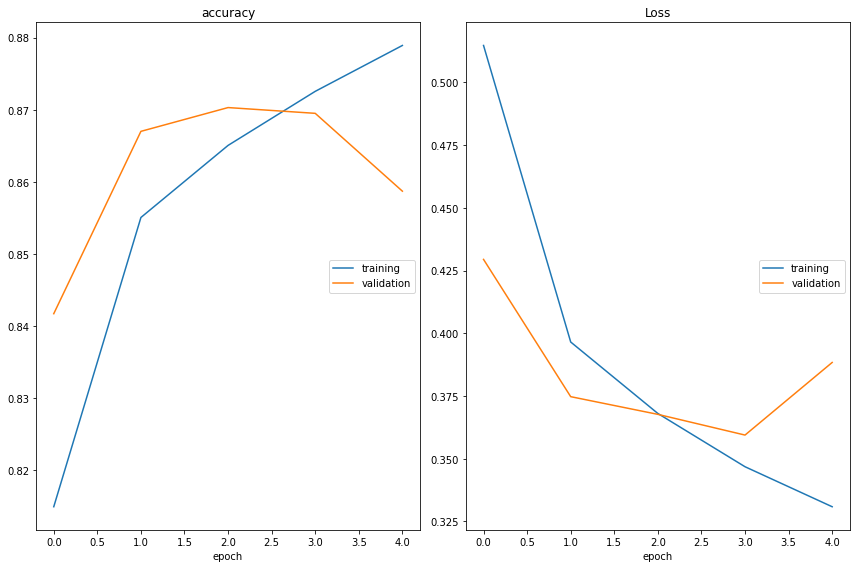

accuracy
	training         	 (min:    0.815, max:    0.879, cur:    0.879)
	validation       	 (min:    0.842, max:    0.870, cur:    0.859)
Loss
	training         	 (min:    0.331, max:    0.515, cur:    0.331)
	validation       	 (min:    0.359, max:    0.429, cur:    0.388)
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3309 - accuracy: 0.8789 - val_loss: 0.3884 - val_accuracy: 0.8587


In [ ]:
# Load & Prepare Data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile Model
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train Model
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKerasTF()],
          verbose=1)

#### **Activation Function**

https://towardsdatascience.com/activation-functions-in-deep-learning-from-softmax-to-sparsemax-math-proof-50c1eb293456

##### **Linear**

In [ ]:
activation = 'linear'

##### **Sigmoid (Logistic Regression)**

In [ ]:
activation = tf.keras.activations.sigmoid

In [ ]:
activation = 'sigmoid'

* $g(z)=\frac{1}{1+e^{-z}}$

<br> 
**Characteristics**
* Logistic regression. Takes a real-valued number as an input and compresses all its outputs to the range of [0,1]. Sigmoid only for binary classification output layer.
* Sigmoid activation derived from mean field solution of Boltzmann machine
* Softmax function is a more generalized logistic activation function which is used for multiclass classification.

**Advantages**
* In the logistic function, a small change in the input only causes a small change in the output as opposed to the stepped output. Hence, the output is smoother than the step function output.
* Historically popular since they have nice interpretation as a saturating “firing rate” of a neuron.
* The function is differentiable.That means, we can find the slope of the sigmoid curve at any two points.
* Especially used for models where we have to predict the probability as an output (of a binary problem).
* Sigmoid works well for a classifier: approximating a classifier function as combinations of sigmoid is easier than maybe ReLu, for example. Which will lead to faster training process and convergence

**Disadvantages**
* exp() is a bit compute expensive. Learning time longer. Also other functions have been shown to produce the same performance with less iterations. Additionally: small local gradients can mute the gradient and disallow the forward propagation of a useful signal.
* The sigmoid function is monotonic but function’s derivative is not: the tails of the first derivative of a Sigmoid are near zero (covariate shift), which lead to vanishing or exploding gradient. Incorrect weight initialization can lead to saturation, where most neurons of the network then become saturated and almost no learning will take place. Saturated neurons “kill” the gradients (look at x= -10, 0 and 10). Can cause the neural network to get stuck during training. If a strongly-negative input is provided to the logistic sigmoid, it outputs values very near zero. Since neural networks usethe feed-forward activations to calculate parameter gradients, this can result in model parameters that are updated less regularly than we would like, and are thus “stuck” in their current state (this problem can be solved if we normalize the data in advance to be zero-centered as in batch/layer normalization).
* Sigmoid outputs are not zero-centered. Neurons in later layers of processing in a neural net would be receiving data that is not zero-centered. If data coming into is always positive, the gradient on the weights 𝑤 will during backpropagation become either all be positive, or all negative. This could introduce undesirable zig-zagging dynamics in the gradient updates for the weights. (However, notice that once these gradients are added up across a batch of data the final update for the weights can have variable signs, somewhat mitigating this issue. Therefore, this is an inconvenience but it has less severe consequences compared to the saturated activation problem.)

*Example: there are two parameter w1 and w 2; f the gradients of two dimensions are always of the same sign, it means we can only move roughly in the direction of northeast or southwest in the parameter space. If our goal happens to be in the northeast, we can only move in a zig-zagging fashion to get there, just like parallel parking in a narrow space.*

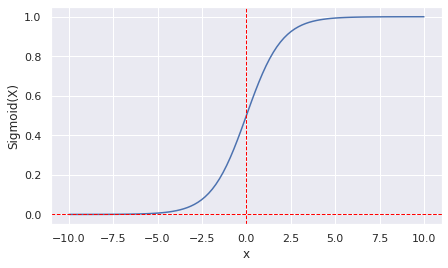

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})

# Increasing weight size or input scale will form function steeper
weight_size = 1
input_scale_upper = 10
input_scale_lower = -10
resolution = 100

x = np.linspace(input_scale_lower, input_scale_upper, resolution) 
z = 1/(1 + np.exp(-(weight_size)*x)) 
  
plt.plot(x, z), plt.xlabel("x"), plt.ylabel("Sigmoid(X)") 
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0);
plt.show() 

##### **tanh (hyperbolic tangent)**

In [ ]:
activation = tf.keras.activations.tanh

In [ ]:
activation = 'tanh'

* $g(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$
* LeCun et al., 1991
* The tanh function "squashes" values to the range -1 and 1. Output values are, therefore, centered around zero. Can be thought of as a scaled, or shifted, sigmoid, and is almost always preferable to the sigmoid function
* Squashes numbers to range [-1,1]
* zero centered (nice)
* The advantage is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.
* The function is differentiable.
* The function is monotonic while its derivative is not monotonic.
* The tanh function is mainly used classification between two classes.
* still kills gradients when saturated

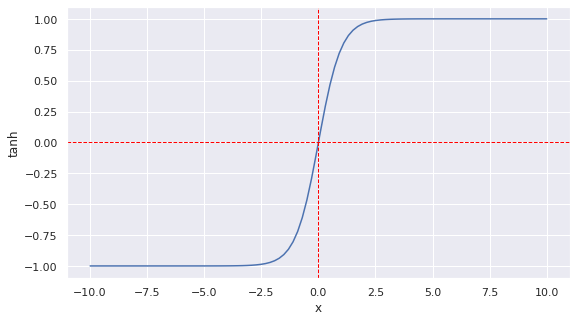

In [ ]:
x = np.linspace(-10, 10, 100) 
z = (np.tanh(x)) 
  
plt.plot(x, z), plt.xlabel("x"), plt.ylabel("tanh") 
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0);
plt.show()

##### **Softmax**

In [ ]:
activation = tf.keras.layers.Softmax(axis=-1)

In [ ]:
activation = 'softmax'

* is an activation function that is not function of a single fold x from the previous layer or layers.
* usually used in the last layer
* Softmax Regression (synonyms: Multinomial Logistic, Maximum Entropy Classifier, or just Multi-class Logistic Regression) 
* is a generalization of logistic regression that we can use for multi-class classification (under the assumption that the classes are mutually exclusive). We use the (standard) Logistic Regression model in binary classification tasks. in softmax regression (SMR), we replace the sigmoid logistic function by the so-called€softmax function€φ

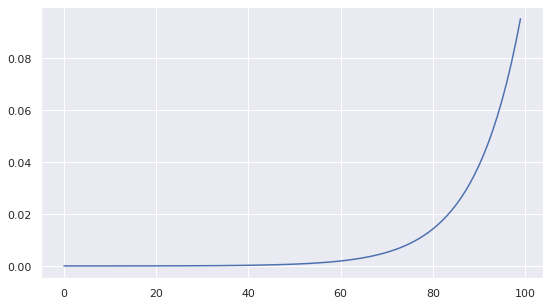

In [ ]:
x = np.arange(-5, 5, 0.1)
plt.plot(np.exp(x) / np.sum(np.exp(x)))

##### **ReLU (Rectified Linear Unit)**

In [ ]:
activation = tf.keras.layers.ReLU(max_value=None,
                                 negative_slope=0,
                                 threshold=0)

In [ ]:
activation = 'relu'

* $g(z)=\max (0, z)$

<br>

Transformation leads positive values to be 1, and negative values to be zero. Shown to accelerate convergence of gradient descent compared to above functions. Can lead to neuron death, which can be combated using Leaky ReLU modification (see [1]). ReLU is has become the default activation function for hidden layers (see [3])

**Characteristics**
* Krizhevsky et al., 2012
* rectified linear units, faster and more efficient, since fewer neurons are activated (less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations). 
* No gradient vanishing problem, as Relu’s gradient is constant = 1. Sparsity: since output 0 for negative values of x! When W*x < 0, Relu gives 0, which means sparsity. Less calculation load. This may be least important. 
* However, ReLu may amplify the signal inside the network more than softmax and sigmoid. 
* But: dying ReLU problem for values zero and smaller: neurons will never reactivated. Solution: leaky ReLU, noisy ReLU (in RBMs) and ELU (exponential linear units)
* ReLU as the activation function for hidden layers and sigmoid for the output layer (these are standards, didn’t experiment much on changing these). Also, I used the standard categorical cross-entropy loss.

**Advantages**
* Does not saturate (in +region)
* Very computationally efficient
* Converges much faster than sigmoid/tanh in practice (e.g. 6x)
Actually more biologically plausible than sigmoid

**Disadvantages**
* Not zero-centered output
* An annoyance: what is the gradient when x < 0? What happens when x = -10, 0 or 10?
* People like to initialize ReLU neurons with slightly positive biases (e.g. 0.01)



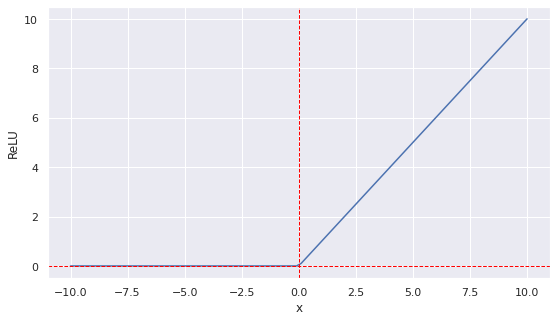

In [ ]:
x = np.linspace(-10, 10, 100) 
z = (np.maximum(0, x))
  
plt.plot(x, z), plt.xlabel("x"), plt.ylabel("ReLU") 
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0);
plt.show()

##### **Leaky ReLU**

* $\begin{aligned}
g(z) &=\max (\epsilon z, z) \\
& \text { with } \epsilon \ll 1
\end{aligned}$

* Mass et al., 2013 and He et al., 2015
* Leaky ReLUs allow a small, positive gradient when the unit is not active
* Does not saturate
* Computationally efficient
* Converges much faster than sigmoid/tanh in practice! (e.g. 6x) will not “die”.z = np.arange(-55, 5, 1)
plt.plot(np.maximum(0.01 * z, z))

In [ ]:
z = np.arange(-55, 5, 1)
plt.plot(np.maximum(0.01 * z, z))

In [ ]:
activation = tf.keras.layers.LeakyReLU(alpha=0.3)

##### **ELU**

* Exponential Linear Units
* Clevert et al., 2015
* All benefits of ReLU
* Closer to zero mean outputs
* Negative saturation regime compared with Leaky ReLU adds some robustness to noise 
* But Computation requires exp()

##### **Swish**

* Google Brain 2017
* Variant of ReLU

https://medium.com/@jaiyamsharma/experiments-with-swish-activation-function-on-mnist-dataset-fc89a8c79ff7

https://medium.com/@neuralnets/swish-activation-function-by-google-53e1ea86f820

https://www.machinecurve.com/index.php/2019/05/30/why-swish-could-perform-better-than-relu/



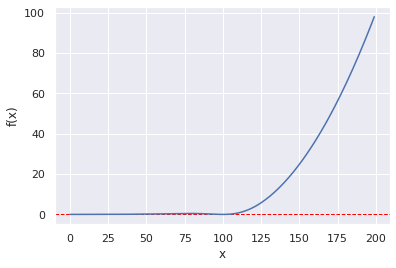

In [ ]:
x = np.arange(-10, 10, 0.1)
plt.xlabel('x'), plt.ylabel('f(x)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
beta = 1.0
# plt.plot(x * (1 / (1 + np.exp(-x))))
plt.plot(x * ((1 / (1 + np.exp(-x))) * (beta * x)))

##### **SeLU**

* scaled exponential linear units
* instead of normalizing the output of the activation function — the activation function suggested (SELU — scaled exponential linear units) outputs normalized values. https://towardsdatascience.com/selu-make-fnns-great-again-snn-8d61526802a9
* Background: batchnormalization for feedfirward networks: Training Deep Neural Networks is complicated by the fact that the distribution of each layer's inputs changes during training, as the parameters of the previous layers change. This slows down the training by requiring lower learning rates and careful parameter initialization, and makes it notoriously hard to train models with saturating nonlinearities. (https://arxiv.org/abs/1502.03167)
* Negative values sometimes: Scaling the function is the mechanism by which the authors accomplish the goal (of self-normalizing properties). As a byproduct, they sometimes output negative values, but there's no hidden meaning in it. It just makes the math work out. 
* **SELU vs RELU**: https://www.hardikp.com/2017/07/24/SELU-vs-RELU/

##### **Custom Activation Function**

In [ ]:
# Weibull - Cumulative Distribution Function
sns.set(rc={'figure.figsize':(4, 4)})
x = np.linspace(0, 25, 10000) 
shape = 5 # k
scale = 1 # λ
# Simple: z = 1 - (np.exp(-(x/λ)**k))
z = scipy.stats.weibull_min.cdf(x, c=shape, scale=scale)

plt.title('Weibull Distribution')
plt.plot(x, z)
plt.show(xlim(0,2))

In [ ]:
# Rayleigh Distribution
sns.set(rc={'figure.figsize':(4, 4)})
x = np.linspace(0, 25, 10000) 
σ = 0.3
z = 1 - (np.exp((-x**2)/(2*σ**2)))

plt.plot(x, z)
# plt.title('Rayleigh Distribution')
plt.show(xlim(0,2)) 

In [ ]:
# Distribution fitting against Rayleigh

from scipy.stats import norm,rayleigh
samp = rayleigh.rvs(loc=5,scale=2,size=150) # samples generation
param = rayleigh.fit(samp) # distribution fitting

x = linspace(5,13,100)
# fitted distribution
pdf_fitted = rayleigh.pdf(x,loc=param[0],scale=param[1])
# original distribution
pdf = rayleigh.pdf(x,loc=5,scale=2)

title('Rayleigh distribution')
plot(x,pdf_fitted,'r-',x,pdf,'b-')
hist(samp,normed=1,alpha=.3)
show()

##### **Define Model & Run**

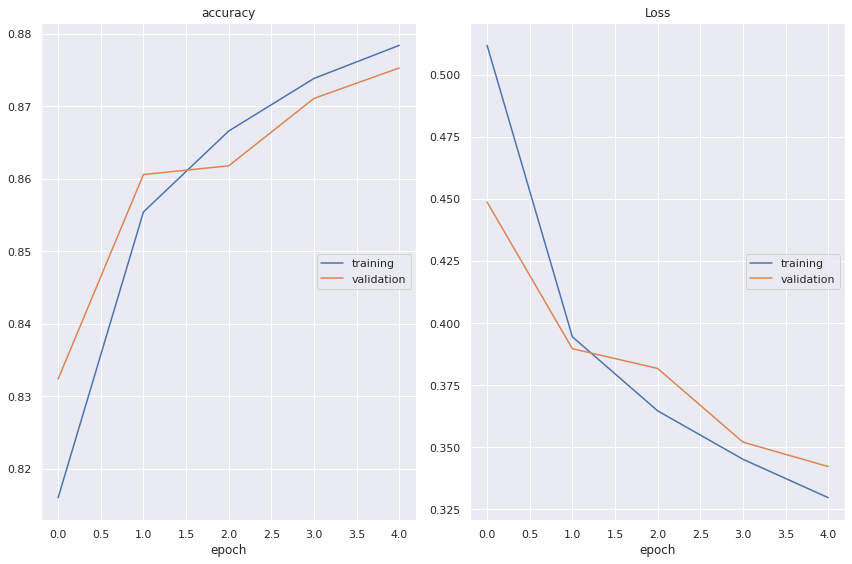

accuracy
	training         	 (min:    0.816, max:    0.878, cur:    0.878)
	validation       	 (min:    0.832, max:    0.875, cur:    0.875)
Loss
	training         	 (min:    0.330, max:    0.512, cur:    0.330)
	validation       	 (min:    0.342, max:    0.449, cur:    0.342)
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3297 - accuracy: 0.8784 - val_loss: 0.3422 - val_accuracy: 0.8753


In [ ]:
# Load & Prepare Model
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation=activation)) 
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile Model
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train Model
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKerasTF()],
          verbose=1)

##### **Deep Dive**

* The activation function is the non-linear function that we apply over the output data coming out of a particular layer of neurons before it propagates as the input to the next layer.
* Activation functions reside within neurons and transform input values into acceptable and useful range. They can introduce non-linearity to a network.
* There are various kinds of activation functions and it has been found, empirically, that some of them works better for large datasets or particular problems than the others. 
* Neural networks extract hidden pattern from a dataset by observing given examples of known answers. Evidently, it does so by comparing its predictions to the ground truth (labeled images for example) and turning the parameters of the model. The difference between the prediction and the ground truth is called the ‘classification error’.
* Parameters of a DL model consists of a set of weights connecting neurons across layers and bias terms which add to those layers. So, the ultimate goal is to set those weights to specific values which reduces the overall classification error. This is a minimization operation, and consequently, an optimization technique is needed.
* The overall representation structure of a deep learning model is a highly complex nonlinear function and therefore, the optimizer is responsible for minimizing the error produced by the evaluation of this complex function. Therefore, standard optimization like linear programming does not work for DL models and innovative nonlinear optimization must be used.
* These two components – **activation functions** and **nonlinear optimizers** – are at the core of every deep learning architecture. However, there is considerable variety in the specifics of these components.



**Necessary Characteristics of Activation Function**

Activation functions must be:

1. Non-constant (obvious)
2. Bounded
3. Monotonically increasing
4. Continuous

These are the conditions under which the universal approximation theorem holds. The universal approximation theorem proves that, under the above conditions, any continuous function of N-variables defined on a compact subset of R^N can be approximated by a three- layer (input, hidden layer, output) neural network with that activation function.

The universal approximation theorem is certainly one of the most rigorous tenets of neural networks.

Of course, if the prediction problem at hand does not deal with continuous variables or cannot be approximated by a problem that does, then the above is no longer valid and the choice of activation functions becomes more of a customized problem.

**Selection Criteria**

Activation layers are a type of hyperparameter, and you’ll need to experiment with all of them in order to find which works best for you. You can narrow your search by referring to prior work in the field for your particular problem. For example, it has already been shown that tanh activations work better for image classification while leaky ReLUs work better for temporal sequences such as video.

Sources: [Stanford.edu](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning) & [Deep Dive into Math Behind Deep Networks](https://towardsdatascience.com/https-medium-com-piotr-skalski92-deep-dive-into-deep-networks-math-17660bc376ba)

**Sigmoid Family**

Im Allgemeinen ist eine Sigmoidfunktion eine beschränkte und differenzierbare reelle Funktion mit einer durchweg positiven oder durchweg negativen ersten Ableitung und genau einem Wendepunkt.

Außer der logistischen Funktion enthält die Menge der Sigmoidfunktionen den Arkustangens, den Tangens hyperbolicus und die Fehlerfunktion, die sämtlich transzendent sind, aber auch einfache algebraische Funktionen. 

Das Integral jeder stetigen, positiven Funktion mit einem „Berg“ (genauer: mit genau einem lokalen Maximum und keinem lokalen Minimum, z. B. die gaußsche Glockenkurve) ist ebenfalls eine Sigmoidfunktion. Daher sind viele kumulierte Verteilungsfunktionen sigmoidal.

**Rectifier Functions Family**

* https://en.m.wikipedia.org/wiki/Rectifier_(neural_networks)

**Advantages**
* Biological plausibility: One-sided, compared to the antisymmetry of tanh.
* Sparse activation: For example, in a randomly initialized network, only about 50% of hidden units are activated (having a non-zero output).
* Better gradient propagation: Fewer vanishing gradient problems compared to sigmoidal activation functions that saturate in both directions.
* Efficient computation: Only comparison, addition and multiplication.
* Scale-invariant: 


**Disadvantages**
* Non-differentiable at zero; however, it is differentiable anywhere else, and the value of the derivative at zero can be arbitrarily chosen to be 0 or 1.
* Not zero-centered.
* Unbounded.
* Dying ReLU problem: ReLU neurons can sometimes be pushed into states in which they become inactive for essentially all inputs. In this state, no gradients flow backward through the neuron, and so the neuron becomes stuck in a perpetually inactive state and "dies". This is a form of the vanishing gradient problem. In some cases, large numbers of neurons in a network can become stuck in dead states, effectively decreasing the model capacity. This problem typically arises when the learning rate is set too high. It may be mitigated by using leaky ReLUs instead, which assign a small positive slope for x < 0

## **Cost (Loss) Functions**

https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa

### **Introduction**

https://allenkunle.me/deriving-ml-cost-functions-part1

##### **Introduction**

**Really good intro by Brandon Rohrer**: https://youtu.be/fr7dfyfB7mI

Cost, loss, risk or error function

Properties of ideal Cost functions:

* smooth, 
* continuous, 
* symmetric (but i.e. Non-symmetric losses: e.g., for spam classification)
* differentials

https://en.m.wikipedia.org/wiki/Loss_function

https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications

$\min _{W}\left\{L(W):=\frac{1}{m} \sum_{i=1}^{m} \ell\left(W ; x_{i}, y_{i}\right)+\lambda r(W)\right\}$

Complete list of [Loss / Cost Functions in TF](https://www.tensorflow.org/api_docs/python/tf/keras/losses/)

https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

https://stackoverflow.com/questions/45648351/what-is-difference-between-loss-function-and-rmse-in-machine-learning

https://medium.com/@phuctrt/loss-functions-why-what-where-or-when-189815343d3f

https://towardsdatascience.com/what-is-loss-function-1e2605aeb904

https://datascience.stackexchange.com/questions/10188/why-do-cost-functions-use-the-square-error

https://towardsdatascience.com/coding-deep-learning-for-beginners-linear-regression-part-2-cost-function-49545303d29f

https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#kullback-leibler

https://towardsdatascience.com/https-medium-com-chayankathuria-regression-why-mean-square-error-a8cad2a1c96f

http://www.cs.cornell.edu/courses/cs4780/2015fa/web/lecturenotes/lecturenote10.html

**Overview: Similarity Learning & Distance Metric Learning**

* Ähnlichkeitsmaße werden für nominal oder ordinal skalierte Variablen genutzt

* Distanzmaße werden für metrisch skalierte Variablen (d. h. für Intervall- und Verhältnisskala) genutzt.

https://en.m.wikipedia.org/wiki/Similarity_learning

https://en.m.wikipedia.org/wiki/Distance

https://cs.gmu.edu/~carlotta/teaching/CS775-s10/readings/LearningMetrics.pdf

**Similarity learning** is closely related to distance metric learning. Metric learning is the task of learning a distance function over objects. A metric or distance function has to obey four axioms: non-negativity, identity of indiscernibles, symmetry and subadditivity (or the triangle inequality). **In practice, metric learning algorithms ignore the condition of identity of indiscernibles and learn a pseudo-metric.**



https://en.m.wikipedia.org/wiki/Similarity_learning#Metric_learning

**Similarity Measure** In statistics and related fields, a similarity measure or similarity function is a real-valued function that quantifies the similarity between two objects.

Although no single definition of a similarity measure exists, usually such measures are in some sense the inverse of distance metrics: they take on large values for similar objects and either zero or a negative value for very dissimilar objects.

Cosine similarity is a commonly used similarity measure for real-valued vectors, used in (among other fields) information retrieval to score the similarity of documents in the vector space model. In machine learning, common kernel functions such as the RBF kernel can be viewed as similarity functions.

https://en.m.wikipedia.org/wiki/Similarity_measure

**Distance Metric Learning & Distance Measures**

Distanzmaße werden für metrisch skalierte Variablen (d. h. für Intervall- und Verhältnisskala) genutzt.
https://cs.gmu.edu/~carlotta/teaching/CS775-s10/readings/LearningMetrics.pdf

![xxx](https://raw.githubusercontent.com/deltorobarba/repo/master/cost.jpg)

The loss function computes the error for a single training example, while the cost function is the average of the loss functions of the entire training set.


Also: objective function, error, cost & loss function. A loss function measures the quality of a particular set of parameters based on how well the induced scores agreed with the ground truth labels in the training data. We saw that there are many ways and versions of this (e.g. Softmax/SVM).
gradient of cost function tells each weight how to change to improve overall prediction 
MLPClassifier trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters. 

We want to find the local minimum of the cost function

Quadratic cost (mean squared error MSE): 
also maximum likelihood, and sum squared error.  
Most common. Used in regression.  
Mean squared error is appropriate to regression (line/curve fitting) where the goal is to minimize the mean squared error between the training set (points) and the fitted curve. 


##### **Similarity Learning & Similarity Measures**

*Ähnlichkeitsmaße werden für nominal oder ordinal skalierte Variablen genutzt*

**Overview**

In der Statistik, insbesondere der Multivariaten Statistik, interessiert man sich für die Messung der Ähnlichkeit zwischen verschiedenen Objekten und definiert dazu Ähnlichkeits- und Distanzmaße. **Es handelt sich dabei nicht um Maße im mathematischen Sinn**, der Begriff bezieht sich ausschließlich auf die Messung einer bestimmten Größe.

https://de.m.wikipedia.org/wiki/Ähnlichkeitsanalyse

https://de.m.wikipedia.org/wiki/Distanzfunktion

https://en.m.wikipedia.org/wiki/Distance_(graph_theory)

https://en.m.wikipedia.org/wiki/Distance

**Jaccard-Koeffizient**

https://de.m.wikipedia.org/wiki/Jaccard-Koeffizient

**Yules Index**

Yules Index ist ein statistischer Messwert, der die Uniformität oder Diversität des Wortschatzes bestimmt. Er wurde vom schottischen Statistiker George Udny Yule entwickelt und misst die Wahrscheinlichkeit, mit der zwei zufällig ausgewählte Wörter eines Textes identisch sind – und zwar weitgehend unabhängig vom Umfang des Textes.Diesen Index hat Herdan aufgegriffen und weiterentwickelt.

https://de.m.wikipedia.org/wiki/Yules_Index

**Pearson Korrelationskoeffizient**

https://de.m.wikipedia.org/wiki/Korrelationskoeffizient

##### **Distance Metric Learning & Distance Measures (& Divergence)**

*Distanzmaße werden für metrisch skalierte Variablen (d. h. für Intervall- und Verhältnisskala) genutzt.*

**Overview**

**Exkurs**: [Distance measures](https://en.m.wikipedia.org/wiki/Distance_measures_(cosmology)) in cosmology are complicated by the [expansion of the universe](https://en.m.wikipedia.org/wiki/Expansion_of_the_universe), and by effects described by the [theory of relativity](https://en.m.wikipedia.org/wiki/Theory_of_relativity) such as [length contraction](https://en.m.wikipedia.org/wiki/Length_contraction) of moving objects.

**Properties of a Divergence, Distance & Metric**

1. $d(x, y) \geq 0 \quad$ (**non-negativity**)

2. $d(x, y)=0$ if and only if $x=y$ (**identity of indiscernibles**. Note that condition 1 and 2 together produce **positive definiteness**)

3. $d(x, y)=d(y, x)$ (**symmetry**)

4. $d(x, z) \leq d(x, y)+d(y, z)$ (**subadditivity / triangle inequality**).

* **Divergence** fullfills property of positive definiteness (1 + 2)

* **Distance** fullfills property of positive definiteness and symmetrie (1 + 2+ 3)

* **Metric** fullfills property of positive definiteness, symmetrie and triangle inequality (1 + 2 + 3 + 4)

* Metric Space: Together with the set, a metric makes up a metric space.

* (*Jede Norm induziert eine Metrik, aber nicht jede Metrik wird durch eine Norm induziert*)

**Distance function vs. Distance Metric**

• Distance Metric:
▫ Satisfy non-negativity, symmetry and triangle
inequation

• Distance Function:
▫ May not satisfy one or more requirements for
distance metric
▫ More general than distance metric

https://www.cs.utexas.edu/~grauman/courses/spring2008/slides/Learning_distance_functions.pdf

**Divergence & 'Statistical Distance'**

In statistics and information geometry, divergence or a contrast function is a function which establishes the **"distance" of one probability distribution to the other** on a statistical manifold. In statistics, probability theory, and information theory, **a statistical distance** quantifies the distance between two statistical objects, which can be

* two random variables, or 
* two probability distributions or 
* two samples, or 
* the distance can be between an individual sample point and a population or 
* a wider sample of points.

A distance between populations can be interpreted as **measuring the distance between two probability distributions** and hence they are essentially measures of distances between probability measures. 

* Where statistical distance measures relate to the differences between random variables, these may have statistical dependence, and hence these distances are not directly related to measures of distances between probability measures. 

* Again, a measure of distance between random variables may **relate to the extent of dependence between them, rather than to their individual values.**

**<u>Many statistical distances are not metrics</u>** (and some types are regerred to as divergence), because they lack one or more properties of proper metrics. For example, 

* [pseudometrics](https://en.m.wikipedia.org/wiki/Pseudometric_space) violate the "positive definiteness" (alternatively, "identity of indescernibles") property (1 & 2 above); 

* [quasimetrics](https://en.m.wikipedia.org/wiki/Metric_(mathematics)#Quasimetrics) violate the symmetry property (3); and semimetrics violate the triangle inequality (4). 

* Statistical distances that satisfy (1) and (2) are referred to as divergences.

* In statistics and information geometry, there are many kinds of statistical distances, notably divergences, especially Bregman divergences and f-divergences. These include and generalize many of the notions of "difference between two probability distributions", and allow them to be studied geometrically, as statistical manifolds. 

* The **most elementary** is the **squared Euclidean distance**, which forms the basis of least squares; this is the most basic Bregman divergence (-> is this a metric then ???)

* The **most important** in information theory is the relative entropy (**Kullback–Leibler divergence**), which allows one to analogously study maximum likelihood estimation geometrically; this is the most basic f-divergence, and is also a Bregman divergence (and is the only divergence that is both). 

* Statistical manifolds corresponding to Bregman divergences are flat manifolds in the corresponding geometry, allowing an analog of the Pythagorean theorem (which is traditionally true for squared Euclidean distance) to be used for linear inverse problems in inference by optimization theory.

* Other important statistical distances include the Mahalanobis distance, the energy distance, and many others.

https://en.m.wikipedia.org/wiki/Information_geometry

https://en.m.wikipedia.org/wiki/Statistical_distance

https://en.m.wikipedia.org/wiki/Divergence_(statistics)

**Exkurs: Meaning of 'no symmetry' in divergences**

* The Kullback-Leibler divergence is not symmetric. Roughly speaking, it's because you should think of the two arguments of the KL divergence as different kinds of things: the first argument is empirical data, and the second argument is a model you're comparing the data to. 

* Take a bunch of independent random variables $X_{1}, \ldots, X_{n}$ whose possible values lie in a finite set.

* Say these variables are identically distributed, with $\operatorname{Pr}\left(X_{i}=x\right)=p_{x}$. Let $F_{n, x}$ be the number of variables whose values are equal to $x$. The list $F_{n}$ is a random variable, often called the "empirical frequency distribution" of the $X_{i} .$ What does $F_{n}$ look like when $n$ is very large?

* More specifically, let's try to estimate the probabilities of the possible values of $F_{n} .$ since the set of possible values is different for different $n$, take a sequence of frequency distributions $f_{1}, f_{2}, f_{3}, \ldots$ approaching a fixed frequency distribution $f$. It turns out $^{* *}$ that

> $\lim _{n \rightarrow \infty} \frac{1}{n} \ln \operatorname{Pr}\left(F_{n}=f_{n}\right)=-\mathrm{KL}(f, p)$ 

* In other words, the Kullback-Leibler divergence of $f$ from $p$ lets you estimate the probability of getting an empirical frequency distribution close to $f$ from a large number of independent random variables with distribution $p$.


Excellent article "Information Theory, Relative Entropy and Statistics," by [François Bavaud](https://link.springer.com/chapter/10.1007/978-3-642-00659-3_3)

List of Distances Types

'braycurtis': hdbscan.dist_metrics.BrayCurtisDistance

'canberra': hdbscan.dist_metrics.CanberraDistance

'chebyshev': hdbscan.dist_metrics.ChebyshevDistance

'cityblock': hdbscan.dist_metrics.ManhattanDistance

'dice': hdbscan.dist_metrics.DiceDistance

'euclidean': hdbscan.dist_metrics.EuclideanDistance

'hamming': hdbscan.dist_metrics.HammingDistance

'haversine': hdbscan.dist_metrics.HaversineDistance

'infinity': hdbscan.dist_metrics.ChebyshevDistance

'jaccard': hdbscan.dist_metrics.JaccardDistance

'kulsinski': hdbscan.dist_metrics.KulsinskiDistance

'l1': hdbscan.dist_metrics.ManhattanDistance

'l2': hdbscan.dist_metrics.EuclideanDistance

'mahalanobis': hdbscan.dist_metrics.MahalanobisDistance

'manhattan': hdbscan.dist_metrics.ManhattanDistance

'matching': hdbscan.dist_metrics.MatchingDistance

'minkowski': hdbscan.dist_metrics.MinkowskiDistance

'p': hdbscan.dist_metrics.MinkowskiDistance

'pyfunc': hdbscan.dist_metrics.PyFuncDistance

'rogerstanimoto': hdbscan.dist_metrics.RogersTanimotoDistance

'russellrao': hdbscan.dist_metrics.RussellRaoDistance

'seuclidean': hdbscan.dist_metrics.SEuclideanDistance

'sokalmichener': hdbscan.dist_metrics.SokalMichenerDistance

'sokalsneath': hdbscan.dist_metrics.SokalSneathDistance

'wminkowski': hdbscan.dist_metrics.WMinkowskiDistance

https://hdbscan.readthedocs.io/en/latest/basic_hdbscan.html

https://reference.wolfram.com/language/guide/DistanceAndSimilarityMeasures.html

### **Regression & Forecasting** (mostly distance-based)

##### **Introduction**

![xx](https://raw.githubusercontent.com/deltorobarba/repo/master/regression_loss.PNG)

Loss functions that belong to the category "distance-based" are primarily used in regression problems. They utilize the numeric difference between the predicted output and the true target as a proxy variable to quantify the quality of individual predictions.



http://juliaml.github.io/LossFunctions.jl/stable/losses/distance/

**(Linear) Least Squares**

* Least Squares: Deren Parameter werden so bestimmt, dass die Summe der Abweichungsquadrate e der Beobachtungen y von den Werten der Funktion minimiert wird.

* Da die Kleinste-Quadrate-Schätzung die Residuenquadratsumme minimiert, ist es dasjenige Schätzverfahren, welches das [Bestimmtheitsmaß](https://de.wikipedia.org/wiki/Bestimmtheitsmaß) maximiert.

* Das Bestimmtheitsmaß der Regression, auch empirisches Bestimmtheitsmaß, ist eine dimensionslose Maßzahl die den Anteil der Variabilität in den Messwerten der abhängigen Variablen ausdrückt, der durch das lineare Modell „erklärt“ wird. Mithilfe dieser Definition können die Extremwerte für das Bestimmtheitsmaß aufgezeigt werden. Für das
Bestimmtheitsmaß gilt, dass es umso năher am Wert 1 ist, je kleiner die Residuenquadratsumme ist. Es wird maximal gleich 1 wenn $\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}=0$ ist, also alle Residuen null sind. In diesem Fall ist die Anpassung an die Daten perfekt, was bedeutet, dass für jede Beobachtung $y_{i}=\hat{y}_{i}$ ist.

* [Least Squares](https://en.wikipedia.org/wiki/Least_squares) / [Methode der kleinsten Quadrate](https://de.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate) & [Linear Least Squares](https://en.wikipedia.org/wiki/Linear_least_squares)

**Gauss–Markov theorem (BLUE)**

*  states that the ordinary least squares (OLS) estimator has the lowest sampling variance within the class of linear unbiased estimators, **if the errors in the linear regression model are uncorrelated, have equal variances and expectation value of zero**.

* stellt eine theoretische Rechtfertigung der Methode der kleinsten Quadrate dar

* Der Satz besagt, dass in einem linearen Regressionsmodell, in dem die **Störgrößen (error term) einen Erwartungswert von null und eine konstante Varianz haben sowie unkorreliert sind** (Annahmen des klassischen linearen Regressionsmodells), der Kleinste-Quadrate-Schätzer – vorausgesetzt er existiert – ein bester linearer erwartungstreuer Schätzer ist (englisch Best Linear Unbiased Estimator, kurz: BLUE). 

* Hierbei bedeutet der „beste“, dass er – innerhalb der Klasse der linearen erwartungstreuen Schätzer – die „kleinste“ Kovarianzmatrix aufweist und somit minimalvariant ist. Die Störgrößen müssen nicht notwendigerweise normalverteilt sein. Sie müssen im Fall der verallgemeinerten Kleinste-Quadrate-Schätzung auch nicht unabhängig und identisch verteilt sein.

The Gauss-Markov assumptions concern the set of error random variables, $\varepsilon_{i}:$

1. They have mean zero: $\mathrm{E}\left[\varepsilon_{i}\right]=0$ 

2. They are homoscedastic, that is all have the same finite variance: $\operatorname{Var}\left(\varepsilon_{i}\right)=\sigma^{2}<\infty$ for all $i$,
3. Distinct error terms are uncorrelated: $\operatorname{Cov}\left(\varepsilon_{i}, \varepsilon_{j}\right)=0, \forall i \neq j$.

A linear estimator of $\beta_{j}$ is a linear combination $\widehat{\beta}_{j}=c_{1 j} y_{1}+\cdots+c_{n j} y_{n}$

* The errors do not need to be normal, nor do they need to be independent and identically distributed (only uncorrelated with mean zero and homoscedastic with finite variance). 

* The requirement that the estimator be unbiased cannot be dropped, since biased estimators exist with lower variance. See, for example, the [James–Stein estimator](https://en.wikipedia.org/wiki/James–Stein_estimator) (which also drops linearity), [ridge regression(Tikhonov_regularization)](https://en.wikipedia.org/wiki/Tikhonov_regularization), or simply any [degenerate estimator](https://en.wikipedia.org/wiki/Degenerate_distribution).

* https://en.wikipedia.org/wiki/Gauss–Markov_theorem

**Ordinary Least Squares (OLS)**

* Ordinary least squares is a type of linear least squares method for estimating the unknown parameters in a linear regression model.  

* “Ordinary Least Squares” (OLS) method is used to find the best line intercept (b) and the slope (m). [in y = mx + b, m is the slope and b the intercept]


> $m=\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum\left(x_{i}-\bar{x}\right)^{2}}$

> $b=\bar{y}-m * \bar{x}$

* In other words → with OLS Linear Regression the goal is to find the line (or hyperplane) that minimizes the vertical offsets. We define the best-fitting line as the line that minimizes the sum of squared errors (SSE) or mean squared error (MSE) between our target variable (y) and our predicted output over all samples i in our dataset of size n.

* OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function

* The OLS method minimizes the sum of squared residuals, and leads to a [closed-form expression](https://en.wikipedia.org/wiki/Closed-form_expression) for the estimated value of the unknown parameter vector β.

* It is important to point out though that OLS method will work for a univariate dataset (ie., single independent variables and single dependent variables). Multivariate dataset contains a single independent variables set and multiple dependent variables sets, requiring a machine learning algorithm called “Gradient Descent”.

* [Wiki](https://en.wikipedia.org/wiki/Ordinary_least_squares) & [Medium](https://medium.com/@jorgesleonel/linear-regression-307937441a8b)

**Weighted Least Squares (WLS)**

* are used when heteroscedasticity is present in the error terms of the model.
* https://en.wikipedia.org/wiki/Weighted_least_squares

**Generalized Least Squares (GLS)**

* is an extension of the OLS method, that **allows efficient estimation of β when either heteroscedasticity, or correlations, or both are present among the error terms of the model**, as long as the form of heteroscedasticity and correlation is known independently of the data. 

* To handle heteroscedasticity when the error terms are uncorrelated with each other, GLS minimizes a weighted analogue to the sum of squared residuals from OLS regression, where the weight for the ith case is inversely proportional to var(εi). This special case of GLS is called "weighted least squares". 

* https://en.wikipedia.org/wiki/Generalized_least_squares

##### **SE, SAE & SSE**

**Sum of Errors (SE)** the difference in the predicted value and the actual value.

$\mathbf{L}=\Sigma(\hat{Y}-Y)$

Errors terms cancel each other out. 


**Sum of Absolute Errors (SAE)** takes the absolute values of the errors for all iterations.

$\mathbf{L}=\Sigma (|\hat{Y}-Y|)$

This loss function is not differentiable at 0. 

**Sum of Squared Errors (SSE)** is differentiable at all points and gives non-negative errors. But you could argue that why cannot we go for higher orders like 4th order or so. Then what if we consider to take 4th order loss function, which would look like:

$\mathbf{L}=\left[\Sigma(\hat{Y}-Y)^{2}\right]$

The gradient of the loss function will vanish at minima & maxima. And the error will grow with the sample size.

![xxx](https://raw.githubusercontent.com/deltorobarba/repo/master/sumoferrors.png)

* Minimizing Sum of Squared Errors / SSE ([wiki](https://de.m.wikipedia.org/wiki/Residuenquadratsumme) and [medium](https://medium.com/@dustinstansbury/cutting-your-losses-loss-functions-the-sum-of-squared-errors-loss-4c467d52a511)).  We can think of the SSE loss as the (unscaled) variance of the model errors. 
* Therefore **minimizing the SEE loss is equivalent to minimizing the variance of the model residuals**. For this reason, the sum of squares loss is often referred to as the Residual Sum of Squares error (RSS) for linear models. We can think of minimizing the SSE loss as maximizing the covariance between the real outputs and those predicted by the model.
* Ideal when distribution of residuals in normal: the [Gauss-Markov theorem](https://en.wikipedia.org/wiki/Gauss–Markov_theorem) states that if errors of a linear function are distributed Normally about the mean of the line, then the LSS solution gives the [best unbiased estimator](https://en.wikipedia.org/wiki/Bias_of_an_estimator) for the parameters .
* Problem: Because each error is squared, any outliers in the dataset can dominate the parameter estimation process. For this reason, the LSS loss is said to lack robustness. Therefore preprocessing of the the dataset (i.e. removing or thresholding outlier values) may be necessary when using the LSS loss

##### **MSE (L2) & RMSE**

**Squared Euclidean Distance**

* Squared Euclidean distance is of central importance in estimating parameters of statistical models, where it is used in the method of least squares, a standard approach to regression analysis. 

* The corresponding loss function is the squared error loss (SEL), and places progressively greater weight on larger errors. The corresponding risk function (expected loss) is mean squared error (MSE).

* **Squared Euclidean distance is not a metric**, as it does not satisfy the triangle inequality. However, **it is a more general notion of distance, namely a divergence** (specifically a Bregman divergence), and can be used as a statistical distance. 

https://en.m.wikipedia.org/wiki/Euclidean_distance#Squared_Euclidean_distance

![bb](https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/3d-function-2.svg/566px-3d-function-2.svg.png)

*A paraboloid, the graph of squared Euclidean distance from the origin*

![bb](https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/3d-function-5.svg/566px-3d-function-5.svg.png)

*A cone, the graph of Euclidean distance from the origin in the plane*

**Mean Squared Error**

In [ ]:
loss = 'mse'

$\mathrm{MSE}={\frac{1}{n} \sum_{j=1}^{n}\left(y_{j}-\hat{y}_{j}\right)^{2}}$

* Mean Squared Error (L2 or Quadratic Loss). Error decreases as we increase our sample data as the distribution of our data becomes more and more narrower (referring to normal distribution). The more data we have, the less is the error.
* Can range from 0 to ∞ and are indifferent to the direction of errors. It is  negatively-oriented scores, which means lower values are better. It is always non – negative and values close to zero are better. The MSE is the second moment of the error (about the origin) and thus incorporates both the variance of the estimator and its bias.
* Problem: Sensitive to outliers and the order of loss is more than that of the data. As my data is of order 1 and the loss function, MSE has an order of 2 (squared). So we cannot directly correlate data with the error. 
* [Wikipedia](https://de.m.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate)

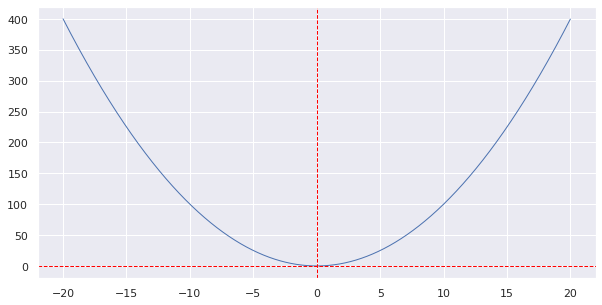

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MSE loss function
def mse_loss(y_pred, y_true):
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y_true.size
    return loss
    
# Plotting
x_vals = np.arange(-20, 20, 0.01)
y_vals = np.square(x_vals)

sns.set(rc={'figure.figsize':(10, 5), "lines.linewidth": 1.0})
# plt.plot(x_vals, y_vals, "blue")
plt.plot(x_vals, y_vals)
plt.grid(True, which="major")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0)
plt.show()

In [ ]:
def mse(predictions, targets):
    # Retrieving number of samples in dataset
    samples_num = len(predictions)
    
    # Summing square differences between predicted and expected values
    accumulated_error = 0.0
    for prediction, target in zip(predictions, targets):
        accumulated_error += (prediction - target)**2
        
    # Calculating mean and dividing by 2
    mae_error = (1.0 / (2*samples_num)) * accumulated_error
    
    return mae_error

In [ ]:
def MSE(y_predicted, y):
  squared_error = (y_predicted - y) ** 2
  sum_squared_error = np.sum(squared_error)
  mse = sum_squared_error / y.size
  return(mse)

**Mean Squared Logarithmic Error (MSLR)**

* Mean Squared Logarithmic Error
* https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredLogarithmicError

**RMSE**

In [ ]:
tf.keras.metrics.RootMeanSquaredError(
    name='root_mean_squared_error', dtype=None
)

$\mathrm{RMSE}=\sqrt{\frac{1}{n} \sum_{j=1}^{n}\left(y_{j}-\hat{y}_{j}\right)^{2}}$

* Root-Mean-Square Error is the distance, on average, of a data point from the fitted line, measured along a vertical line.
* The **RMSE is directly interpretable in terms of measurement units**, and so is a better measure of goodness of fit than a correlation coefficient. One can compare the RMSE to observed variation in measurements of a typical point. The two should be similar for a reasonable fit. Metric can range from 0 to ∞ and are indifferent to the direction of errors. It is  negatively-oriented scores, which means lower values are better.
* Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable
* https://www.sciencedirect.com/science/article/pii/S096014811831231X
* The **RMSE is more appropriate to represent model performance than the MAE when the error distribution is expected to be Gaussian**.
https://www.geosci-model-dev-discuss.net/7/C473/2014/gmdd-7-C473-2014-supplement.pdf
* When both metrics are calculated, the MAE tends to be much smaller than the RMSE because the RMSE penalizes large errors while the MAE gives the same weight to all errors.
* They summarized that the **RMSE tends to become increasingly larger than the MAE** (but not necessarily in a monotonic fashion) as the distribution of error magnitudes becomes more variable. The RMSE tends to 1 grow larger than the MAE with n2 since its lower limit is fixed at the MAE and its upper 11 limit (n2 · MAE) increases with n2 .
* [Wiki](https://en.m.wikipedia.org/wiki/Root-mean-square_deviation) & [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/RootMeanSquaredError)

**RMSLE**

* Abzüge für Fehler nach der relativen Größe statt des absoluten Werts vornehmen. Das ist besonders hilfreich, wenn sowohl die vorhergesagten als auch die tatsächlichen Werte sehr groß werden können. Nicht gültig für eine Zielspalte mit negativen Werten

**RMSPE**

##### **MAE (L1) & MAPE**

In [ ]:
loss = 'mae'

$\mathrm{MAE}=\frac{1}{n} \sum_{j=1}^{n}\left|y_{j}-\hat{y}_{j}\right|$

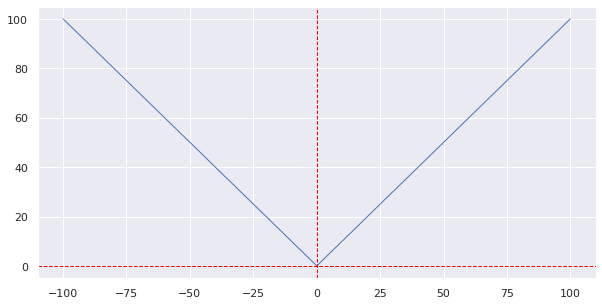

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MAE loss function
def mae_loss(y_pred, y_true):
    abs_error = np.abs(y_pred - y_true)
    sum_abs_error = np.sum(abs_error)
    loss = sum_abs_error / y_true.size
    return loss
    
# Plotting
x_vals = np.arange(-100, 100, 0.01)
y_vals = np.abs(x_vals)

sns.set(rc={'figure.figsize':(10, 5), "lines.linewidth": 1.0})
plt.plot(x_vals, y_vals)
plt.grid(True, which="major")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0)
plt.show()

*If the absolute value is not taken (the signs of the errors are not removed), the average error becomes the Mean Bias Error (MBE) and is usually intended to measure average model bias. MBE can convey useful information, but should be interpreted cautiously because positive and negative errors will cancel out.*

* Mean Absolute Error (L1 Loss)
* Computes the mean of absolute difference between labels and predictions
* measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.
* On some regression problems, the **distribution of the target variable may be mostly Gaussian, but may have outliers**, e.g. large or small values far from the mean value. The Mean Absolute Error, or MAE, loss is an appropriate loss function in this case as it is more robust to outliers. It is calculated as the average of the absolute difference between the actual and predicted values.
* Metric can range from 0 to ∞ and are indifferent to the direction of errors. It is  negatively-oriented scores, which means lower values are better.
* Extremwerte als Ausreißer mit geringerem Einfluss auf das Modell ansehen: MAE loss is useful if the training data is corrupted with outliers (i.e. we erroneously receive unrealistically huge negative/positive values in our training environment, but not our testing environment).


In [ ]:
def mae(predictions, targets):
    # Retrieving number of samples in dataset
    samples_num = len(predictions)
    
    # Summing absolute differences between predicted and expected values
    accumulated_error = 0.0
    for prediction, target in zip(predictions, targets):
        accumulated_error += np.abs(prediction - target)
        
    # Calculating mean
    mae_error = (1.0 / samples_num) * accumulated_error
    
    return mae_error

**MSE vs MSE**

One big problem in using MAE loss (for neural nets especially) is that its gradient is the same throughout, which means the gradient will be large even for small loss values. This isn’t good for learning. To fix this, we can use dynamic learning rate which decreases as we move closer to the minima. MSE behaves nicely in this case and will converge even with a fixed learning rate. The gradient of MSE loss is high for larger loss values and decreases as loss approaches 0, making it more precise at the end of training (see figure below.)

![xx](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/mae_vs_mse.PNG)

**Mean Absolute Percentage Error (MAPE)**

In [ ]:
tf.keras.losses.MAPE(
    y_true, y_pred
)

$\mathrm{M}=\frac{1}{n} \sum_{t=1}^{n}\left|\frac{A_{t}-F_{t}}{A_{t}}\right|$

* The mean absolute percentage error (MAPE) is a statistical measure of **how accurate a forecast** system is. 

* It measures this accuracy as a percentage, and can be calculated as the average absolute percent error for each time period minus actual values divided by actual values. Where At is the actual value and Ft is the forecast value.

* The mean absolute percentage error (MAPE) is the most common measure used to forecast error, and works best if there are no extremes to the data (and no zeros).

* https://en.m.wikipedia.org/wiki/Mean_absolute_percentage_error

**Symmetric Mean Absolute Percentage Error (sMAPE)**

In [ ]:
# Import Keras backend
import keras.backend as K

# Define SMAPE loss function
def customLoss(true,predicted):
    epsilon = 0.1
    summ = K.maximum(K.abs(true) + K.abs(predicted) + epsilon, 0.5 + epsilon)
    smape = K.abs(predicted - true) / summ * 2.0
    return smape

# https://medium.com/@mlguy/adding-custom-loss-and-optimizer-in-keras-e255764e1b7d

There are 3 different definitions of sMAPE. 2 of them are below:

$\operatorname{SMAPE}=\frac{100 \%}{n} \sum_{t=1}^{n} \frac{\left|F_{t}-A_{t}\right|}{\left(\left|A_{t}\right|+\left|F_{t}\right|\right) / 2}$

* Symmetric mean absolute percentage error (SMAPE or sMAPE) is an accuracy measure based on percentage (or relative) errors. 

* At is the actual value and Ft is the forecast value

* The absolute difference between At and Ft is divided by half the sum of absolute values of the actual value At and the forecast value Ft. The value of this calculation is summed for every fitted point t and divided again by the number of fitted points n.

* Armstrong's original definition is as follows:

$\mathrm{SMAPE (old)}=\frac{1}{n} \sum_{t=1}^{n} \frac{\left|F_{t}-A_{t}\right|}{\left(A_{t}+F_{t}\right) / 2}$

* The problem is that it can be negative (if ${\displaystyle A_{t}+F_{t}<0}$) or even undefined (if ${\displaystyle A_{t}+F_{t}=0}$). Therefore the currently accepted version of SMAPE assumes the absolute values in the denominator.

* In contrast to the mean absolute percentage error, SMAPE has both a lower bound and an upper bound. Indeed, the formula above provides a result between 0% and 200%. However a percentage error between 0% and 100% is much easier to interpret. That is the reason why the formula below is often used in practice (i.e. no factor 0.5 in denominator)

* One supposed problem with SMAPE is that it is not symmetric since over- and under-forecasts are not treated equally. This is illustrated by the following example by applying the second SMAPE formula:

  * Over-forecasting: At = 100 and Ft = 110 give SMAPE = 4.76%

  * Under-forecasting: At = 100 and Ft = 90 give SMAPE = 5.26%.

* [Wiki](https://en.m.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error) & [Wiki2](https://wiki2.org/en/Symmetric_mean_absolute_percentage_error) & [other](https://www.brightworkresearch.com/the-problem-with-using-smape-for-forecast-error-measurement/)

**Mean absolute scaled error (MASE)**

* mean absolute scaled error (MASE) is a measure of the accuracy of forecasts.

*  It is the mean absolute error of the forecast values, divided by the mean absolute error of the in-sample one-step naive forecast. It was proposed in 2005.

* The mean absolute scaled error has the following desirable propertie: [Wiki](https://en.wikipedia.org/wiki/Mean_absolute_scaled_error)

##### **Huber**

In [ ]:
loss = tf.keras.losses.Huber(delta=10.0, name='huber_loss')

TLDR: will better find a minimum than L1, but less exposed to outliers than L2. However one has to tune the hyperparameter delta. The larger (3+), the more it is L2, the smaller (1), the more it is L1.

![huber](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/huberloss.jpg)

* For target = 0, the loss increases when the error increases. However, the speed with which it increases depends on this 𝛿 value. In fact, Grover (2019) writes about this as follows: Huber loss approaches MAE when 𝛿 ~ 0 and MSE when 𝛿 ~ ∞ (large numbers.)


![xx](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Huber_loss.svg/320px-Huber_loss.svg.png)

*Huber loss (green, 
δ
=
1) and squared error loss (blue) as a function of 
y
−
f
(
x
)*

$L_{\delta}(y, f(x))=\left\{\begin{array}{ll}
\frac{1}{2}(y-f(x))^{2} & \text { for }|y-f(x)| \leq \delta \\
\delta|y-f(x)|-\frac{1}{2} \delta^{2} & \text { otherwise }
\end{array}\right.$

When you compare this statement with the benefits and disbenefits of both the MAE and the MSE, you’ll gain some insights about how to adapt this delta parameter:

* **If your dataset contains large outliers**, it’s likely that your model will not be able to predict them correctly at once. In fact, it might take quite some time for it to recognize these, if it can do so at all. This results in large errors between predicted values and actual targets, because they’re outliers. Since MSE squares errors, large outliers will distort your loss value significantly. If outliers are present, you likely don’t want to use MSE. Huber loss will still be useful, but you’ll have to use small values for 𝛿.

* If it does not contain many outliers, it’s likely that it will generate quite accurate predictions from the start – or at least, from some epochs after starting the training process. In this case, you may observe that the errors are very small overall. Then, one can argue, it may be worthwhile to let the largest small errors contribute more significantly to the error than the smaller ones. In this case, MSE is actually useful; hence, with Huber loss, you’ll likely want to use quite large values for 𝛿.

* If you don’t know, you can always start somewhere in between – for example, in the plot above, 𝛿 = 1 represented MAE quite accurately, while 𝛿 = 3 tends to go towards MSE already. What if you used 𝛿 = 1.5 instead? You may benefit from both worlds.

https://www.machinecurve.com/index.php/2019/10/12/using-huber-loss-in-keras/

The biggest problem with using MAE to train neural networks is the constant large gradient, which may cause the minimum point to be missed when the gradient descent is about to end. For MSE, the gradient will decrease as the loss decreases, making the result more accurate.

In this case, Huber loss is very useful. It will fall near the minimum value due to the decreasing gradient. It is more robust to outliers than MSE. Therefore, Huber loss combines the advantages of MSE and MAE. However, the problem with Huber loss is that we may need to constantly adjust the hyperparameters

https://www.programmersought.com/article/86974383768/

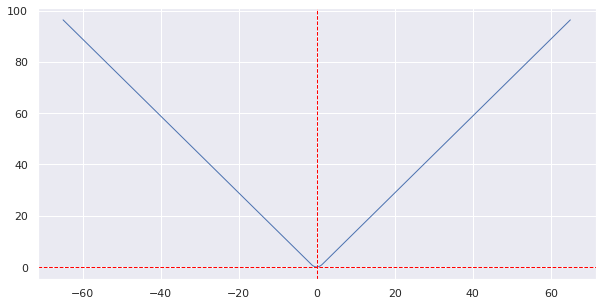

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Huber loss function
def huber_loss(y_pred, y, delta=1.0):
    huber_mse = 0.5*(y-y_pred)**2
    huber_mae = delta * (np.abs(y - y_pred) - 0.5 * delta)
    return np.where(np.abs(y - y_pred) <= delta, huber_mse, huber_mae)
    
# Plotting
x_vals = np.arange(-65, 65, 0.01)

# Hyperparameter
delta = 1.5

# Formula
huber_mse = 0.5*np.square(x_vals)
huber_mae = delta * (np.abs(x_vals) - 0.5 * delta)
y_vals = np.where(np.abs(x_vals) <= delta, huber_mse, huber_mae)

sns.set(rc={'figure.figsize':(10, 5), "lines.linewidth": 1.0})
plt.plot(x_vals, y_vals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0)
plt.grid(True, which="major")
plt.show()

# https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3

* Huber Loss (Smooth Mean Absolute Error)

* The Huber loss **combines the best properties of MSE and MAE** (Mean Absolute Error). It is quadratic for smaller errors and is linear otherwise (and similarly for its gradient). It is identified by its delta parameter.

* It's **less sensitive to outliers** in data than the squared error loss. It’s **also differentiable at 0**. It’s basically absolute error, which becomes quadratic when error is small.  How small that error has to be to make it quadratic depends on a hyperparameter 𝛿. 

* Once differentiable.

* **Huber loss approaches MSE when 𝛿 ~ 0 and MAE when 𝛿 ~ ∞**

* The choice of delta is critical because it determines what you’re willing to consider as an outlier. Residuals larger than delta are minimized with L1 (which is less sensitive to large outliers), while residuals smaller than delta are minimized “appropriately” with L2.

* One big problem with using MAE for training of neural nets is its constantly large gradient, which can lead to missing minima at the end of training using gradient descent. For MSE, gradient decreases as the loss gets close to its minima, making it more precise.
Huber loss can be really helpful in such cases, as it curves around the minima which decreases the gradient. And it’s more robust to outliers than MSE. Therefore, **it combines good properties from both MSE and MAE**. 

* However, the problem with Huber loss is that we might need to train hyperparameter delta which is an iterative process.

* [Wiki](https://en.m.wikipedia.org/wiki/Huber_loss) * [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/losses/Huber)

##### **Log-Cosh**

TLDR: Similar to MAE, will not be affected by outliers. Log-Cosh has all the points of Huber loss, and no need to set hyperparameters. Compared with Huber, Log-Cosh derivation is more complicated, requires more computation, and is not used much in deep learning. 


In [ ]:
loss = tf.keras.losses.LogCosh()

* Log-cosh is another function used in regression tasks that’s smoother than L2 (is smoothed towards large errors (presumably caused by outliers) so that the final error score isn’t impacted thoroughly.)
* Log-cosh is the logarithm of the hyperbolic cosine of the prediction error. “Log-cosh is the logarithm of the hyperbolic cosine of the prediction error.” (Grover, 2019). Oops, that’s not intuitive but nevertheless quite important – this is the maths behind Logcosh loss:

> $\log \cosh (t)=\sum_{p \in P} \log (\cosh (p-t))$

* Similar to Huber Loss, but twice differentiable everywhere
* [Wiki Hyperbolic Functions](https://en.m.wikipedia.org/wiki/Hyperbolic_functions), [TF Class](https://www.tensorflow.org/api_docs/python/tf/keras/losses/LogCosh), [Machinecurve](https://www.machinecurve.com/index.php/2019/10/23/how-to-use-logcosh-with-keras/)

![logcosh](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/logcosh.jpeg)

However, Log-Cosh is second-order differentiable everywhere, which is still very useful in some machine learning models. For example, XGBoost uses Newton's method to find the best advantage. Newton's method requires solving the second derivative (Hessian). Therefore, for machine learning frameworks such as XGBoost, the second order of the loss function is differentiable. But the Log-cosh loss is not perfect, and there are still some problems. For example, if the error is large, the first step and Hessian will become fixed, which leads to the lack of split points in XGBoost.

https://www.programmersought.com/article/86974383768/

##### **Quantile**

TLDR: for Heteroskedastizität, i.e. for risk management when variance changes. Quantile Loss, you can set different quantiles to control the proportion of overestimation and underestimation in loss.

In [ ]:
loss = tfa.losses.PinballLoss(tau=.1)

The usual regression algorithm is to fit the expected or median training data, and the quantile loss function can be used to fit different quantiles of training data by giving different quantiles. As shown below



![sdd](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/quantileloss.jpg)

Set different quantiles to fit different straight lines.



This function is a piecewise functio., γ is the quantile coefficient. y is the true value, f(x) is the predicted value. According to the size of the predicted value and the true value, there are two cases to consider. 

y>f(x) For overestimation, the predicted value is greater than the true value; 

y<f(x) to underestimate, the predicted value is smaller than the real value.

Use different pass coefficients to control the weight of overestimation and underestimation in the entire loss value.

Especially when γ=0.5 When the quantile loss degenerates into the mean absolute error MAE, **MAE can also be regarded as a special case of quantile loss-median loss**. The picture below is taken with different median points [0.25,0.5,0.7] Obtaining different quantile loss function curves can also be seen as MAE at 0.5.

![fgfgf](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/quantileloss2.jpg)

![xx](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Pinball_Loss_Function.svg/320px-Pinball_Loss_Function.svg.png)

*Pinball-Verlustfunktion mit 
τ
=0,9. Für 
ε
<
0 beträgt der Fehler 
−
0
,
1
ε, für 
ε
≥
0 beträgt er 
0
,
9
ε.*

* Quantile Loss (Pinball Loss)
* estimates conditional “quantile” of a response variable given certain values of predictor variables
* is an extension of MAE (**when quantile is 50th percentile, it’s MAE**)
* Im Gegensatz zur Kleinste-Quadrate-Schätzung, die den Erwartungswert der Zielgröße schätzt, ist die Quantilsregression dazu geeignet, ihre Quantile zu schätzen.
* Fitting models for many percentiles, you can estimate the entire conditional distribution. Often, the answers to important questions are found by modeling percentiles in the tails of the distribution. For that reason **quantile regression provides critical insights in financial risk management & fraud detection**. 
* [Wikipedia](https://de.m.wikipedia.org/wiki/Quantilsregression), [TF Class](https://www.tensorflow.org/addons/api_docs/python/tfa/losses/PinballLoss) & [TF Function](https://www.tensorflow.org/addons/api_docs/python/tfa/losses/pinball_loss)

https://www.evergreeninnovations.co/blog-quantile-loss-function-for-machine-learning/

* project where predictions were subject to high uncertainty. The client required for their decision to be driven by both the predicted machine learning output and a measure of the potential prediction error. The quantile regression loss function solves this and similar problems by replacing a single value prediction by prediction intervals.

* The quantile regression loss function is applied to predict quantiles. A quantile is the value below which a fraction of observations in a group falls. For example, a prediction for quantile 0.9 should over-predict 90% of the times.

* For q equal to 0.5, under-prediction and over-prediction will be penalized by the same factor, and the median is obtained. The larger the value of q, the more over-predictions are penalized compared to under-predictions. For q equal to 0.75, over-predictions will be penalized by a factor of 0.75, and under-predictions by a factor of 0.25. The model will then try to avoid over-predictions approximately three times as hard as under-predictions, and the 0.75 quantile will be obtained.

##### **Poisson Loss**

In [ ]:
tf.keras.losses.poisson(
    y_true, y_pred
)

https://towardsdatascience.com/the-poisson-distribution-103abfddc312

https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459

https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/poisson

https://openacttexts.github.io/Loss-Data-Analytics/C-RiskClass.html

### **Classification** (mostly entropy-/ divergence-based or margin-based)

##### **Introduction**

https://en.wikipedia.org/wiki/Loss_functions_for_classification

https://www.machinecurve.com/index.php/2019/10/04/about-loss-and-loss-functions/#loss-functions-for-classification

https://arxiv.org/pdf/1702.05659.pdf

http://cs229.stanford.edu/extra-notes/loss-functions.pdf

##### **Cross-Entropy-based**

**Cross Entropy**

* the cross entropy between two probability distributions p and q **over the same underlying set of events** measures the average number of bits needed to identify an event drawn from the set if a coding scheme used for the set is optimized for an estimated probability distribution q, rather than the true distribution p.

https://en.m.wikipedia.org/wiki/Cross_entropy

https://en.m.wikipedia.org/wiki/Cross-entropy_method

Conditional Entropy the conditional entropy (or equivocation)
quantifies the amount of information needed to describe the outcome of a random variable $Y$ given that the value of another
random variable $X$ is known. Here, information is measured in shannons, nats, or hartleys. The entropy of $Y$ conditioned on $X$ is written as $\mathrm{H}(Y \mid X)$

https://en.m.wikipedia.org/wiki/Conditional_entropy

Joint Entropy: In information theory, joint entropy is a measure of the uncertainty associated with a set of variables.

https://en.m.wikipedia.org/wiki/Joint_entropy

**Binary Cross-Entropy**

https://en.m.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression

https://towardsdatascience.com/log-loss-function-math-explained-5b83cd8d9c83

$-(y \log (p)+(1-y) \log (1-p))$

* Cross-Entropy or Log-Loss (Logistic Loss/ negative log-likelihood) 

* It measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. 

* So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value.  A perfect model would have a log loss of 0.

* Cross-entropy and log loss are slightly different depending on context, but in machine learning when calculating error rates between 0 and 1 they resolve to the same thing. 

* Cross-entropy is the default loss function to use for binary classification problems.

* It is intended for use with binary classification where the target values are in the set {0, 1}.

* Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.

* Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for predicting class 1. The score is minimized and a perfect cross-entropy value is 0.

* The function requires that the output layer is configured with a single node and a ‘sigmoid‘ activation in order to predict the probability for class 1.

**Sparse Categorical Cross-Entropy (Multiclass)**

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss = 'sparse_categorical_crossentropy'

* Cross-entropy is the default loss function to use for multi-class classification problems.

* In this case, it is intended for use with multi-class classification where the target values are in the set {0, 1, 3, …, n}, where each class is assigned a unique integer value.

* Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.

* Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for all classes in the problem. The score is minimized and a perfect cross-entropy value is 0.

* A possible cause of frustration when using cross-entropy with classification problems with a large number of labels is the one hot encoding process.

* For example, predicting words in a vocabulary may have tens or hundreds of thousands of categories, one for each label. This can mean that the target element of each training example may require a one hot encoded vector with tens or hundreds of thousands of zero values, requiring significant memory.

* Sparse cross-entropy addresses this by performing the same cross-entropy calculation of error, without requiring that the target variable be one hot encoded prior to training.



##### **Divergence-based**

**Kullback-Leibler Divergence (Multiclass)**

In [ ]:
loss = tf.keras.losses.KLDivergence(name='kl_divergence')

https://en.m.wikipedia.org/wiki/Kullback–Leibler_divergence

* Kullback Leibler Divergence, or KL Divergence for short, is a measure of how one probability distribution differs from a baseline distribution. 

* A KL divergence loss of 0 suggests the distributions are identical. In practice, the behavior of KL Divergence is very similar to cross-entropy. It calculates how much information is lost (in terms of bits) if the predicted probability distribution is used to approximate the desired target probability distribution. 

* As such, the KL divergence loss function is more commonly used when using models that learn to **approximate a more complex function than simply multi-class classification**, such as in the case of an autoencoder used for learning a dense feature representation under a model that must reconstruct the original input. In this case, KL divergence loss would be preferred. 

* Nevertheless, it can be used for **multi-class classification, in which case it is functionally equivalent to multi-class cross-entropy**.

* Kullback Leibler Divergence, or KL Divergence for short, is a measure of how one probability distribution differs from a baseline distribution.

* A KL divergence loss of 0 suggests the distributions are identical. In practice, the behavior of KL Divergence is very similar to cross-entropy. It calculates how much information is lost (in terms of bits) if the predicted probability distribution is used to approximate the desired target probability distribution.

* As such, the KL divergence loss function is more commonly used when using models that learn to approximate a more complex function than simply multi-class classification, such as in the case of an autoencoder used for learning a dense feature representation under a model that must reconstruct the original input. In this case, KL divergence loss would be preferred. Nevertheless, it can be used for multi-class classification, in which case it is functionally equivalent to multi-class cross-entropy.

* [TF doc](https://www.tensorflow.org/api_docs/python/tf/keras/losses/KLDivergence)

The only divergence that is both an f-divergence and a Bregman divergence is the Kullback–Leibler divergence

https://en.m.wikipedia.org/wiki/Kullback–Leibler_divergence

Use for example as **loss function in variational autoencoder**

https://www.kaggle.com/debanga/statistical-distances

https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf

* the Kullback–Leibler divergence (also called relative entropy) is a measure of how one probability distribution is different from a second, reference probability distribution.

* Applications include characterizing the relative (Shannon) entropy in information systems, randomness in continuous time-series, and information gain when comparing statistical models of inference. 

* In contrast to variation of information, **it is a distribution-wise asymmetric measure** and thus **does not qualify as a statistical metric of spread** - it also does not satisfy the triangle inequality.

* In the simple case, a Kullback–Leibler divergence of 0 indicates that the two distributions in question are identical. In simplified terms, it is a measure of surprise, with diverse applications such as applied statistics, fluid mechanics, neuroscience and machine learning.

**Jensen–Shannon divergence**

* It is based on the Kullback–Leibler divergence, with some notable (and useful) differences, including that it is symmetric and it always has a finite value. The square root of the Jensen–Shannon divergence is a metric often referred to as Jensen-Shannon distance
* use in GAN's for example (Goodfellow, Ian J.; Pouget-Abadie, Jean; Mirza, Mehdi; Xu, Bing; Warde-Farley, David; Ozair, Sherjil; Courville, Aaron; Bengio, Yoshua (2014). Generative Adversarial Networks. NIPS. arXiv:1406.2661. Bibcode:2014arXiv1406.2661G)
* https://en.m.wikipedia.org/wiki/Generative_adversarial_network
* https://en.m.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence

**f-Divergence**

* Probabilistic models are often trained by maxi- mum likelihood, which corresponds to minimiz- ing a specific f-divergence between the model and data distribution. 

* In light of recent suc- cesses in training Generative Adversarial Networks, alternative non-likelihood training crite- ria have been proposed.

https://arxiv.org/pdf/1907.11891.pdf

https://arxiv.org/pdf/1905.12888.pdf

https://en.m.wikipedia.org/wiki/F-divergence

The Hellinger distance is a type of f-divergence

https://en.m.wikipedia.org/wiki/Hellinger_distance

https://www.mis.mpg.de/fileadmin/pdf/geoasp_2008_petz.pdf

**Hellinger Distance**

*  the Hellinger distance (closely related to, although different from, the Bhattacharyya distance) is used to **quantify the similarity between two probability distributions**. 

* **It is a type of f-divergence.**

* (?) ist vielleicht sogar eine metric weil es triangle inequality erfüllt.

https://en.m.wikipedia.org/wiki/Hellinger_distance

**Bregman Divergence**

In machine learning, Bregman divergences are used to calculate the bi-tempered logistic loss, performing better than the softmax function with noisy datasets

https://en.m.wikipedia.org/wiki/Bregman_divergence

The squared Euclidean divergence is a Bregman divergence (corresponding to the function x<sup>2</sup>, but not an f-divergence

COST-SENSITIVE CLASSIFICATION BASED ON
BREGMAN DIVERGENCES: https://core.ac.uk/download/pdf/29402554.pdf

https://en.m.wikipedia.org/wiki/Euclidean_distance#Squared_Euclidean_distance

**Mahalanobis distance**

* The Mahalanobis distance is a measure of the distance between a point P and a distribution D

* If each of these axes is re-scaled to have unit variance, then the Mahalanobis distance corresponds to standard Euclidean distance in the transformed space. The Mahalanobis distance is thus unitless and scale-invariant, and takes into account the correlations of the data set.

* In statistics, the covariance matrix of the data is sometimes used to define a distance metric called Mahalanobis distance.

* Bregman divergence: **the Mahalanobis distance is an example of a Bregman divergence**

* **Bhattacharyya distance related, for measuring similarity between data sets (and not between a point and a data set** - Mahalanobis distance is a particular case of the Bhattacharyya distance when the standard deviations of the two classes are the same.)

https://en.m.wikipedia.org/wiki/Mahalanobis_distance

* Mahalanobis distance is an effective multivariate distance metric that measures the distance between a point and a distribution. 

* It is an extremely useful metric having, excellent applications **in multivariate anomaly detection, classification on highly imbalanced datasets and one-class classification**. 

![alternativer Text](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/mahalanobis.jpg)

* If the dimensions (columns in your dataset) are correlated to one another, which is typically the case in real-world datasets, the Euclidean distance between a point and the center of the points (distribution) can give little or misleading information about how close a point really is to the cluster.

* The two points above are equally distant (Euclidean) from the center. But only one of them (blue) is actually more close to the cluster, even though, technically the Euclidean distance between the two points are equal.

* This is because, Euclidean distance is a distance between two points only. It does not consider how the rest of the points in the dataset vary. So, it cannot be used to really judge how close a point actually is to a distribution of points.

* **What we need here is a more robust distance metric that is an accurate representation of how distant a point is from a distribution.**

So computationally, how is Mahalanobis distance different from Euclidean distance?

1. It transforms the columns into uncorrelated variables
2. Scale the columns to make their variance equal to 1
3. Finally, it calculates the Euclidean distance.

https://www.machinelearningplus.com/statistics/mahalanobis-distance/

The Mahalanobis distance has the following properties:

* It accounts for the fact that the variances in each direction are different.

* It accounts for the covariance between variables.

* It reduces to the familiar Euclidean distance for uncorrelated variables with unit variance.

Distance in standard units

In statistics, we sometimes measure "nearness" or "farness" in terms of the scale of the data. **Often "scale" means "standard deviation."** For univariate data, we say that an observation that is one standard deviation from the mean is closer to the mean than an observation that is three standard deviations away. (You can also specify the distance between two observations by specifying how many standard deviations apart they are.)

**For many distributions, such as the normal distribution, this choice of scale also makes a statement about probability**. Specifically, it is more likely to observe an observation that is about one standard deviation from the mean than it is to observe one that is several standard deviations away. Why? Because the probability density function is higher near the mean and nearly zero as you move many standard deviations away.

**For normally distributed data, you can specify the distance from the mean by computing the so-called z-score**. For a value x, the z-score of x is the quantity z = (x-μ)/σ, where μ is the population mean and σ is the population standard deviation. This is a dimensionless quantity that you can interpret as the number of standard deviations that x is from the mean.



https://blogs.sas.com/content/iml/2012/02/15/what-is-mahalanobis-distance.html

**Bhattacharyya distance**

* In statistics, the Bhattacharyya distance measures the similarity of two probability distributions. It is closely related to the Bhattacharyya coefficient which is a measure of the amount of overlap between two statistical samples or populations. 

* The coefficient can be used to determine the relative closeness of the two samples being considered. It is used to measure the separability of classes in classification and it is considered to be more reliable than the Mahalanobis distance, as the ***Mahalanobis distance is a particular case of the Bhattacharyya distance** when the standard deviations of the two classes are the same. 

* Consequently, when two classes have similar means but different standard deviations, the Mahalanobis distance would tend to zero, whereas the Bhattacharyya distance grows depending on the difference between the standard deviations.

* under certain conditions does not obey the triangle inequality

https://en.m.wikipedia.org/wiki/Bhattacharyya_distance

##### **Margin-based**

Margin-based loss functions are particularly useful for binary classification. In contrast to the distance-based losses, these do not care about the difference between true target and prediction. Instead they penalize predictions based on how well they agree with the sign of the target.

http://juliaml.github.io/LossFunctions.jl/stable/losses/margin/

**Exponential Loss**

**Hinge Loss**

In [ ]:
tf.keras.losses.hinge(y_true, y_pred)

NameError: ignored

[TF](https://www.tensorflow.org/api_docs/python/tf/keras/losses/hinge)

**Squared Hinge Loss**

* The hinge loss function has many extensions, often the subject of investigation with SVM models.

* A popular extension is called the squared hinge loss that simply calculates the square of the score hinge loss. It has the effect of smoothing the surface of the error function and making it numerically easier to work with.

* If using a hinge loss does result in better performance on a given binary classification problem, is likely that a squared hinge loss may be appropriate.

* As with using the hinge loss function, the target variable must be modified to have values in the set {-1, 1}.

[Wiki](https://en.m.wikipedia.org/wiki/Loss_functions_for_classification)

**Square Loss (also margin-based??)**

* While more commonly used in regression, the square loss function can be re-written as a function  and utilized for classification.

https://en.wikipedia.org/wiki/Loss_functions_for_classification#Square_loss

### **Metric (Similarity) Learning**


If you'd like some theory with your contrastive losses, the first author of SimCLR and SimCLR v2 Ting Chen and Lala Li (both at Google Brain) have an interesting new paper.

https://arxiv.org/pdf/2011.07876.pdf



From the abstract:

"Contrastive loss and its variants have become very popular recently for learning visual representations without supervision. In this work, we first generalize the standard contrastive loss based on cross entropy to a broader family of losses that share an abstract form of L_alignment + λL_distribution, where hidden representations are encouraged to (1) be aligned under some transformations/augmentations, and (2) match a prior distribution of high entropy. We show that various instantiations of the generalized loss perform similarly under the presence of a multi-layer non-linear projection head, and the temperature scaling (τ) widely used in the standard contrastive loss is (within a range) inversely related to the weighting (λ) between the two loss terms. We then study an intriguing phenomenon of feature suppression among competing features shared across augmented views, such as "color distribution" vs "object class". ."

Arxiv: https://lnkd.in/gs4rqGC
Code: https://lnkd.in/gyH3iVN

##### **Similarity Learning vs Regression & Classification**

Similarity learning is an area of supervised machine learning in artificial intelligence. It is closely related to regression and classification, but the goal is to learn a similarity function that measures how similar or related two objects are. It has applications in ranking, in recommendation systems, visual identity tracking, face verification, and speaker verification.

https://en.m.wikipedia.org/wiki/Similarity_learning

**Classification vs Metric Learning**

* **Classification is a “Closed-set” task**. can't add new labels without complete retraining.  The model here is trying to learn separable features in this case — i.e. features, that would allow to assign a label from a predefined set to a given image. The model is trying to find a hyperplane, a rule that separates given classes in space.

* **Metric Learning** is a “Open-set” task. This one means that we do indeed have some predefined set of labels for training, but the model can be applied to any unseen data and it should generalize. In this case the model is trying to solve a metric-learning problem: to learn some sort of similarity metric, and for that it needs to extract discriminative features — features that can be used to distinguish between different people on any two (or more) images. The model is trying not to separate images with a hyperplane, but rather reorganize the input space, pull the similar images together in some form of a cluster while pushing dissimilar images away. 

* This is somewhat reminiscent of clustering problem in Unsupervised Learning — and indeed you can use a model trained on a metric-learning task to create a distance matrix for new data, and than run algorithms like DBSCAN on it to, e.g., cluster images of people’s faces, where each cluster would correspond to a new person.

https://medium.com/@maksym.bekuzarov/losses-explained-contrastive-loss-f8f57fe32246

##### **Ranking, Contrastive & Triplet Loss**

**Ranking & Learning to Rank**

Ranking.. (triplet loss mit similarity learning wird im ranking verwendet, weil es ordinal ist im ggs zu distance learning..)

https://en.m.wikipedia.org/wiki/Ranking_(information_retrieval)

https://en.m.wikipedia.org/wiki/Learning_to_rank

https://en.m.wikipedia.org/wiki/Ranking

https://en.m.wikipedia.org/wiki/Information_retrieval

**Contrastive Loss**

* Contrastive loss was first introduced in 2005 by Yann Le Cunn et al. in this paper and its original application was in Dimensionality Reduction. Now, if you recall, the general goal of a Dimensionality reduction algorithm can be formulated like this:

> Given a sample (a data point) — a D-dimensional vector, transform this sample into a d-dimensional vector, where d ≪ D, while preserving as much information as possible.

* The difference is that Cross-entropy loss is a classification loss which operates on class probabilities produced by the network independently for each sample, and Contrastive loss is a metric learning loss, which operates on the data points produced by network and their positions relative to each other. 

* This is also part of the reason a **cross-entropy loss is not usually used for metric learning tasks** like Face Verification — it doesn’t impose any constraints on the distribution on the model’s inner representation of the given data — i.e. the model can learn any features regardless of whether similar data points would be located closely to each other or not after the transformation.

* for each class/group of similar points (in case of Face Recognition task it would be all the photos of the same person) the **maximum intra-class distance is smaller than the minimum inter-class distance.** 
* It operates on pairs of embeddings received from the model and on the ground-truth similarity flag — a Boolean label, specifying whether these two samples are “similar” or “dissimilar”. So the input must be not one, but 2 images.
* It penalizes “similar” samples for being far from each other in terms of Euclidean distance (although other distance metrics could be used).
* “Dissimilar” samples are penalized by being to close to each other, but in a somewhat different way — Contrastive Loss introduces the concept of “margin” — a minimal distance that dissimilar points need to keep. So it penalizes dissimilar samples for beings closer than the given margin.

**Triplet Loss**

Triplet Loss (a loss function for machine learning algorithms) is often used for learning similarity for the purpose of learning embeddings, like word embeddings and even thought vectors, and metric learning.
https://en.m.wikipedia.org/wiki/Triplet_loss

**Terms**

Ranking Losses are essentialy the ones explained above, and are used in many different aplications with the same formulation or minor variations. However, different names are used for them, which can be confusing. Here I explain why those names are used.

* Ranking loss: This name comes from the information retrieval field, where we want to train models to rank items in an specific order.
* Margin Loss: This name comes from the fact that these losses use a margin to compare samples representations distances.
* Contrastive Loss: Contrastive refers to the fact that these losses are computed contrasting two or more data points representations. This name is often used for * Pairwise Ranking Loss, but I’ve never seen using it in a setup with triplets.
* Triplet Loss: Often used as loss name when triplet training pairs are employed.
* Hinge loss: Also known as max-margin objective. It’s used for training SVMs for classification. It has a similar formulation in the sense that it optimizes until a margin. That’s why this name is sometimes used for Ranking Losses.

**Pairwise Ranking Loss**

dd

**Triplet Ranking Loss**

ddd

https://gombru.github.io/2019/04/03/ranking_loss/

##### **Architectures: Siamese Nets or Triplet Nets**

Siamese and triplet nets are training setups where Pairwise Ranking Loss and Triplet Ranking Loss are used. But those losses can be also used in other setups. 

**Siamese Nets**

Are built by two identical CNNs with shared weights (both CNNs have the same weights). Each one of these nets processes an image and produces a representation. Those representations are compared and a distance between them is computed. Then, a Pairwise Ranking Loss is used to train the network, such that the distance between representations produced by similar images is small, and the distance between representations of dis-similar images is big.

**Triplet Nets**

The idea is similar to a siamese net, but a triplet net has three branches (three CNNs with shared weights). The model is trained by simultaneously giving a positive and a negative image to the corresponding anchor image, and using a Triplet Ranking Loss. That lets the net learn better which images are similar and different to the anchor image.

**Example: Ranking Loss for Multi-Modal Retrieval**

##### **Loss Functions**

[PyTorch] CosineEmbeddingLoss. It’s a Pairwise Ranking Loss that uses cosine distance as the distance metric. Inputs are the features of the pair elements, the label indicating if it’s a positive or a negative pair, and the margin.

[PyTorch] MarginRankingLoss. Similar to the former, but uses euclidian distance.

[PyTorch] TripletMarginLoss. A Triplet Ranking Loss using euclidian distance.

[TensorFlow] contrastive_loss. Pairwise Ranking Loss.

[TensorFlow] triplet_semihard_loss. Triplet loss with semi-hard negative mining.

### **Define Model & Run (Next chapters: Additional Notes to be integrated)**

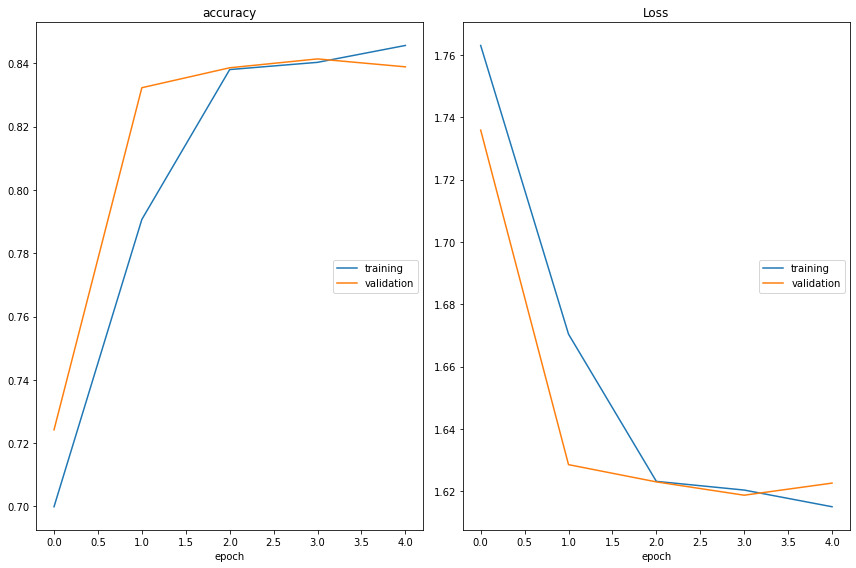

accuracy
	training         	 (min:    0.700, max:    0.846, cur:    0.846)
	validation       	 (min:    0.724, max:    0.841, cur:    0.839)
Loss
	training         	 (min:    1.615, max:    1.763, cur:    1.615)
	validation       	 (min:    1.619, max:    1.736, cur:    1.623)
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6150 - accuracy: 0.8457 - val_loss: 1.6226 - val_accuracy: 0.8389


In [ ]:
# Load & Prepare Data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile Model
model.compile(optimizer='adam', 
              loss=loss, 
              metrics=['accuracy'])

# Train Model
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKerasTF()],
          verbose=1)

### **Cost (Loss) Function**

* The function we want to minimize or maximize is called the objective function or criterion. When we are minimizing it, we may also call it the cost function, loss function, or error function.

* In most cases, our parametric model defines a distribution […] and we simply use the principle of maximum likelihood. This means we use the cross-entropy between the training data and the model’s predictions as the cost function.

* It is important, therefore, that the function faithfully represent our design goals. If we choose a poor error function and obtain unsatisfactory results, the fault is ours for badly specifying the goal of the search.

**Maximum Likelihood Estimation**

* Maximum likelihood seeks to find the optimum values for the parameters by maximizing a likelihood function derived from the training data.

* Given input, the model is trying to make predictions that **match the data distribution of the target variable**. Under maximum likelihood, a loss function estimates how closely the distribution of predictions made by a model matches the distribution of target variables in the training data.

* One way to interpret maximum likelihood estimation is to view it as **minimizing the dissimilarity** between the empirical distribution […] defined by the training set and the model distribution, with the degree of dissimilarity between the two measured by the KL divergence. […] **Minimizing this KL divergence corresponds exactly to minimizing the cross-entropy between the distributions**.

* Under appropriate conditions, the maximum likelihood estimator has the **property of consistency** […], meaning that as the number of training examples approaches infinity, the maximum likelihood estimate of a parameter converges to the true value of the parameter.

* Under the framework maximum likelihood, the error between two probability distributions is measured using cross-entropy. Under maximum likelihood estimation, we would seek a set of model weights that minimize the difference between the model’s predicted probability distribution given the dataset and the distribution of probabilities in the training dataset. This is called the cross-entropy.

When using the framework of maximum likelihood estimation, we will implement a cross-entropy loss function, which often in practice means:
* a **cross-entropy** loss function for classification problems and 
* a **mean squared error** loss function for regression problems.


* Under the framework of maximum likelihood estimation and assuming a **Gaussian distribution for the target variable**, mean squared error can be considered the cross-entropy between the distribution of the model predictions and the distribution of the target variable.

* Many authors use the term “cross-entropy” to identify specifically the negative log-likelihood of a Bernoulli or softmax distribution, but that is a misnomer. 

* Any loss consisting of a negative log-likelihood is a cross-entropy between the empirical distribution defined by the training set and the probability distribution defined by model. 

* For example, **mean squared error is the cross-entropy between the empirical distribution and a Gaussian model**

https://machinelearningmastery.com/cross-entropy-for-machine-learning/

### **Cross-Entropy & Information Theory**

* Cross-entropy is a measure of the difference between two probability distributions for a given random variable or set of events.

* You might recall that information quantifies the number of bits required to encode and transmit an event. Lower probability events have more information, higher probability events have less information.

* Entropy is the number of bits required to transmit a randomly selected event from a probability distribution. A skewed distribution has a low entropy, whereas a distribution where events have equal probability has a larger entropy.

* In information theory, we like to describe the “surprise” of an event. Low probability events are more surprising therefore have a larger amount of information. Whereas probability distributions where the events are equally likely are more surprising and have larger entropy.

* Skewed Probability Distribution (unsurprising): Low entropy.

* Balanced Probability Distribution (surprising): High entropy.

* Entropy can be calculated for a random variable with a set of x in X discrete states discrete states and their probability P(x) as follows:

```
H(X) = – sum x in X P(x) * log(P(x))
```
Cross-entropy builds upon the idea of entropy from information theory and calculates the number of bits required to represent or transmit an average event from one distribution compared to another distribution.


* The intuition for this definition comes if we consider a target or underlying probability distribution P and an approximation of the target distribution Q, then the cross-entropy of Q from P is the number of additional bits to represent an event using Q instead of P.

* The cross-entropy between two probability distributions, such as Q from P, can be stated formally as:

H(P, Q)

* Where H() is the cross-entropy function, P may be the target distribution and Q is the approximation of the target distribution.

* Cross-entropy can be calculated using the probabilities of the events from P and Q, as follows:



```
H(P, Q) = – sum x in X P(x) * log(Q(x))
```

* Where P(x) is the probability of the event x in P, Q(x) is the probability of event x in Q and log is the base-2 logarithm, meaning that the results are in bits. If the base-e or natural logarithm is used instead, the result will have the units called nats.

* This calculation is for discrete probability distributions, although a similar calculation can be used for continuous probability distributions using the integral across the events instead of the sum.

* The result will be a positive number measured in bits and will be equal to the entropy of the distribution if the two probability distributions are identical.

https://machinelearningmastery.com/what-is-information-entropy/

**Cross-Entropy vs KL Divergence vs Logloss**

* Cross-entropy is a measure from the field of information theory, building upon entropy and generally calculating the difference between two probability distributions. It is closely related to but is different from **KL divergence** that calculates the relative entropy between two probability distributions, whereas cross-entropy can be thought to calculate the total entropy between the distributions.

* Cross-entropy is also related to and often confused with **logistic loss, called log loss**. Although the two measures are derived from a different source, when used as loss functions for classification models, both measures calculate the same quantity and can be used interchangeably.



### **Metric (Similarity) Learning**

* Triplet loss is probably the most popular loss function of metric learning. 

https://en.m.wikipedia.org/wiki/Similarity_learning

https://towardsdatascience.com/metric-learning-loss-functions-5b67b3da99a5

### **Distance & Divergence**

**Conditions**

1. d(x, y) ≥ 0     (non-negativity)
2. d(x, y) = 0   if and only if   x = y     (identity of indiscernibles. Note that condition 1 and 2 together produce positive definiteness)
3. d(x, y) = d(y, x)     (symmetry)
4. d(x, z) ≤ d(x, y) + d(y, z)     (subadditivity / triangle inequality).

**Distances**

For continuous data:

* Euclidean Distance
* Manhattan Distance
* Canberra Distance
* Bray Curtis Distance
* Cosine Distance
* Correlation Distance

**Divergences**

* is a (contrast) function which establishes the "distance" of one probability distribution to the other on a statistical manifold. 
* divergence is a weaker notion than that of the distance, in particular the divergence need not be symmetric (that is, in general the divergence from p to q is not equal to the divergence from q to p), and need not satisfy the triangle inequality.
* The two most important divergences are the relative entropy (Kullback–Leibler divergence, KL divergence) and the squared Euclidean distance.
* Minimizing these two divergences is the main way that linear inverse problem are solved, via the principle of maximum entropy and least squares, notably in logistic regression and linear regression.
* The two most important classes of divergences are the f-divergences and Bregman divergences; however, other types of divergence functions are also encountered in the literature. The only divergence that is both an f-divergence and a Bregman divergence is the Kullback–Leibler divergence; the squared Euclidean divergence is a Bregman divergence (corresponding to the function x<sup>2</sup>), but not an f-divergence.

### **Find the similarity between two probability distributions**

Using Jensen Shannon Divergence to build a tool to find the distance between probability distributions using Python.

I was on a mission to find a good measure of difference between two probability distributions. After doing a lot of research online, taking feedback from my colleagues, and validating various methods, I found one that does a really good job.

My problem statement could be solved by calculating the statistical distance between the two probability distributions. To do this, I found out that Jensen Shannon Distance can be used.

Jensen-Shannon Divergence (JSD)is a metric derived from another measure of statistical distance called the Kullback-Leiber Divergence(KLD). The reason why I couldn’t use the KLD is that it’s an asymmetrical function. Since there might have been a lot of distance calculations required, it posed a risk.

JSD, on the other hand, is a symmetrical function and the square root of JSD gives the Jensen-Shannon Distance. A measure that we can use to find the similarity between the two probability distributions. 0 indicates that the two distributions are the same, and 1 would indicate that they are nowhere similar.

Where P & Q are the two probability distribution, M = (P+Q)/2, and D(P ||M) is the KLD between P and M. Similarly D(Q||M) is the KLD between Q and M.
Implementation in Python
Now that we know the formula, it’s time to implement it. First of all, we need to calculate M and also, the KLD between P&M and Q&M.
Scipy is a phenomenal Python Library for scientific computing and it has lots of statistical measures in-built. It turns out that the entropy measure in scipy is implemented using the KLD. Just what we want.

(I found it to be quite simple to implement it with python and I got really good results when I tested it with a few distributions.)


In [ ]:
 # Create test data
p = np.random.rayleigh(3,3)
q = np.random.weibull(3,3)
p, q

(array([3.84848271, 4.18906706, 5.61567569]),
 array([1.036487  , 0.9192782 , 0.63485667]))

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
# Calculate the entropy of a distribution for given probability values
entropy([p, q], base=None)

array([0.51682914, 0.471327  , 0.32851553])

In [ ]:
 m = (p + q) / 2

    # compute Jensen Shannon Divergence
divergence = (scipy.stats.entropy(p, m))

divergence

array([inf, inf, inf])

In [ ]:
# Create function to compute distance
from scipy.stats import entropy
def jensen_shannon_distance(p, q):
    """
    method to compute the Jenson-Shannon Distance 
    between two probability distributions
    """

    # convert the vectors into numpy arrays in case that they aren't
    # p = np.array(p)
    # q = np.array(q)

    # calculate m
    m = (p + q) / 2

    # compute Jensen Shannon Divergence
    divergence = (scipy.stats.entropy(p, m) + scipy.stats.entropy(q, m)) / 2

    # compute the Jensen Shannon Distance
    distance = np.sqrt(divergence)

    return distance

In [ ]:
print(jensen_shannon_distance(eins,zwei))

[inf inf inf]


https://en.wikipedia.org/wiki/Gromov%E2%80%93Hausdorff_convergence

### **Information Entropy**

https://www.kaggle.com/debanga/statistical-distances

https://www.inovex.de/blog/the-mystery-of-entropy-how-to-measure-unpredictability-in-machine-learning/

https://franknielsen.github.io


http://yosinski.com/mlss12/MLSS-2012-Amari-Information-Geometry/


https://www.frontiersin.org/articles/10.3389/fevo.2019.00447/full


https://numerics.mathdotnet.com/Distance.html


https://research.wmz.ninja/articles/2018/03/a-brief-list-of-statistical-divergences.html


https://link.springer.com/article/10.1007/s00362-018-01082-8?shared-article-renderer


https://gmarti.gitlab.io//qfin/2020/07/01/mutual-information-is-copula-entropy.html

https://en.m.wikipedia.org/wiki/Entropy_(information_theory)

https://en.m.wikipedia.org/wiki/Information_theory

### **Information Distance**

##### **Information Gain**

**Mutual Information**

* Mutual Information is also known as information gain.

* In probability theory and information theory, the mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. 

* More specifically, it quantifies the "amount of information" (in units such as shannons, commonly called bits) obtained about one random variable through observing the other random variable. 

* The concept of mutual information is intricately linked to that of entropy of a random variable, a fundamental notion in information theory that quantifies the expected "amount of information" held in a random variable.

* Not limited to real-valued random variables and linear dependence like the correlation coefficient, MI is more general and determines how different the joint distribution of the pair (X, Y) is to the product of the marginal distributions of X and Y. MI is the expected value of the pointwise mutual information (PMI).

https://en.m.wikipedia.org/wiki/Mutual_information

#### **Variation of information**

* In probability theory and information theory, the variation of information or shared information distance is a measure of the distance between two clusterings (partitions of elements). 

* It is closely related to mutual information; indeed, it is a simple linear expression involving the mutual information. 

* Unlike the mutual information, however, **the variation of information is a true metric**, in that it obeys the triangle inequality.

https://en.m.wikipedia.org/wiki/Variation_of_information

### **Quantities of information**

https://en.m.wikipedia.org/wiki/Quantities_of_information

#### **Information Content (Self Information)**

* In information theory, the information content, self-information, surprisal, or Shannon information is a basic quantity derived from the probability of a particular event occurring from a random variable. It can be thought of as an alternative way of expressing probability, much like odds or log-odds, but which has particular mathematical advantages in the setting of information theory.

* The Shannon information can be interpreted as quantifying the level of "surprise" of a particular outcome. As it is such a basic quantity, it also appears in several other settings, such as the length of a message needed to transmit the event given an optimal source coding of the random variable.

* The **Shannon information is closely related to information (theoretic) entropy**, which is the expected value of the self-information of a random variable, quantifying how surprising the random variable is "on average." This is the average amount of self-information an observer would expect to gain about a random variable when measuring it.

* The information content can be expressed in various units of information, of which the most common is the "bit" (sometimes also called the "shannon"), as explained below.

https://en.m.wikipedia.org/wiki/Information_content